# Predict climate from berry fungal communities

> using `ritme` (https://github.com/adamovanja/ritme)

note. use the **ritme_model** environment! 


**Try with only the 2021 harvest samples**

In [65]:
from ritme.find_best_model_config import (
    _load_experiment_config,
    _load_phylogeny,
    _load_taxonomy,
    find_best_model_config,
    save_best_models,
)
from ritme.split_train_test import _load_data, split_train_test
from ritme.evaluate_tuned_models import evaluate_tuned_models

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mlflow
import numpy as np
import os

from sklearn.metrics import r2_score

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries/harvest21

In [5]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries/harvest21'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries/harvest21


In [66]:
# set experiment configuration path 
model_config_path = "/home/lfloerl/microterroir/Microbiome/Other_scripts/config/r_local_linreg_py_noGroup.json"

# define path to feature table, metadata, and taxonomy (no phylogeny)
path_to_ft = "/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/must_harvest21_filtered_table.qza"
path_to_md = "/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv"
path_to_tax = "/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza"

# define train size
train_size = 0.8


# if you want to store the best models, define path where you want to store
# them, else set None
path_to_store_best_models = "Temp_Harvest21_best_models"

In [7]:
config = _load_experiment_config(model_config_path)

# Read & Split data

In [8]:
md, ft = _load_data(path_to_md, path_to_ft)
print(md.shape, ft.shape)

(595, 36) (223, 4603)


In [9]:
train_val, test = split_train_test(
    md,
    ft,
    group_by_column=config["group_by_column"],
    train_size=train_size,
    seed=config["seed_data"],
)

Train: (178, 4639), Test: (45, 4639)


/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/split_train_test.py:139: UserWarning: Provided feature table contains absolute instead of relative abundances. Hence, converting it to relative abundances...
  warnings.warn(


## Find best model config

View the results with navigating to the folder in the terminal (e.g. `cd /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries/ritme_all_models`) and launching  mlflow (`mlflow ui --port 8080`) and opening _http://localhost:8080_ 


**Try different configs** (`experiment_tag`)

* `all_models_noGroup` --> Train: (178, 4639), Test: (45, 4639)
    * "linreg", "xgb", "rf" 
    * no grouping, seed 14 (larger test set)
    * test_mode = true (use entire search space)


In [10]:
tax = _load_taxonomy(path_to_tax)

best_model_dict, path_to_exp = find_best_model_config(
    config, train_val, tax, path_store_model_logs="ritme_linreg_xgb_rf")

(train_rf pid=1058564) Train: (142, 36), Test: (36, 36)


(train_rf pid=1058564) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1058564)   warnings.warn(
2025-02-25 16:20:54,982	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.992 s, which may be a performance bottleneck.
2025-02-25 16:20:54,984	WARNING util.py:201 -- The `process_trial_result` operation took 1.994 s, which may be a performance bottleneck.
2025-02-25 16:20:54,985	WARNING util.py:201 -- Processing trial results took 1.995 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:20:54,986	WARNING util.py:201 -- The `process_trial_result` operation took 1.996 s, which may be a performance bottleneck.
(train_rf pid=1058689) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1058689) Train: (142, 132), Test: (36, 132)


2025-02-25 16:21:02,342	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.364 s, which may be a performance bottleneck.
2025-02-25 16:21:02,344	WARNING util.py:201 -- The `process_trial_result` operation took 2.366 s, which may be a performance bottleneck.
2025-02-25 16:21:02,345	WARNING util.py:201 -- Processing trial results took 2.367 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:21:02,345	WARNING util.py:201 -- The `process_trial_result` operation took 2.368 s, which may be a performance bottleneck.


(train_rf pid=1058800) Train: (142, 112), Test: (36, 112)


(train_rf pid=1058800) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1058800)   warnings.warn(
2025-02-25 16:21:06,430	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.794 s, which may be a performance bottleneck.
2025-02-25 16:21:06,432	WARNING util.py:201 -- The `process_trial_result` operation took 0.795 s, which may be a performance bottleneck.
2025-02-25 16:21:06,433	WARNING util.py:201 -- Processing trial results took 0.796 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:21:06,433	WARNING util.py:201 -- The `process_trial_result` operation took 0.796 s, which may be a performance bottleneck.


(train_rf pid=1058938) Train: (142, 38), Test: (36, 38)


(train_rf pid=1058938) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1058938)   warnings.warn(
2025-02-25 16:21:14,914	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.289 s, which may be a performance bottleneck.
2025-02-25 16:21:14,916	WARNING util.py:201 -- The `process_trial_result` operation took 2.291 s, which may be a performance bottleneck.
2025-02-25 16:21:14,917	WARNING util.py:201 -- Processing trial results took 2.292 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:21:14,917	WARNING util.py:201 -- The `process_trial_result` operation took 2.293 s, which may be a performance bottleneck.
(train_rf pid=1059054) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1059054) Train: (142, 48), Test: (36, 48)


2025-02-25 16:21:20,538	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.352 s, which may be a performance bottleneck.
2025-02-25 16:21:20,539	WARNING util.py:201 -- The `process_trial_result` operation took 2.354 s, which may be a performance bottleneck.
2025-02-25 16:21:20,540	WARNING util.py:201 -- Processing trial results took 2.355 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:21:20,540	WARNING util.py:201 -- The `process_trial_result` operation took 2.355 s, which may be a performance bottleneck.
(train_rf pid=1059163) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1059163)   warnings.warn(


(train_rf pid=1059163) Train: (142, 45), Test: (36, 45)


2025-02-25 16:21:25,857	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.693 s, which may be a performance bottleneck.
2025-02-25 16:21:25,859	WARNING util.py:201 -- The `process_trial_result` operation took 0.695 s, which may be a performance bottleneck.
2025-02-25 16:21:25,860	WARNING util.py:201 -- Processing trial results took 0.696 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:21:25,860	WARNING util.py:201 -- The `process_trial_result` operation took 0.696 s, which may be a performance bottleneck.


(train_rf pid=1059273) Train: (142, 55), Test: (36, 55)


2025-02-25 16:21:34,856	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.714 s, which may be a performance bottleneck.
2025-02-25 16:21:34,858	WARNING util.py:201 -- The `process_trial_result` operation took 2.716 s, which may be a performance bottleneck.
2025-02-25 16:21:34,859	WARNING util.py:201 -- Processing trial results took 2.717 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:21:34,859	WARNING util.py:201 -- The `process_trial_result` operation took 2.718 s, which may be a performance bottleneck.
(train_rf pid=1059386) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1059386)   warnings.warn(


(train_rf pid=1059386) Train: (142, 86), Test: (36, 86)


2025-02-25 16:21:41,358	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.940 s, which may be a performance bottleneck.
2025-02-25 16:21:41,359	WARNING util.py:201 -- The `process_trial_result` operation took 2.942 s, which may be a performance bottleneck.
2025-02-25 16:21:41,360	WARNING util.py:201 -- Processing trial results took 2.942 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:21:41,360	WARNING util.py:201 -- The `process_trial_result` operation took 2.943 s, which may be a performance bottleneck.


(train_rf pid=1059623) Train: (142, 37), Test: (36, 37)


(train_rf pid=1059623) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1059623)   warnings.warn(
2025-02-25 16:21:47,365	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.724 s, which may be a performance bottleneck.
2025-02-25 16:21:47,366	WARNING util.py:201 -- The `process_trial_result` operation took 1.726 s, which may be a performance bottleneck.
2025-02-25 16:21:47,368	WARNING util.py:201 -- Processing trial results took 1.727 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:21:47,369	WARNING util.py:201 -- The `process_trial_result` operation took 1.728 s, which may be a performance bottleneck.


(train_rf pid=1059756) Train: (142, 44), Test: (36, 44)


(train_rf pid=1059756) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1059756)   warnings.warn(
2025-02-25 16:21:56,989	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.758 s, which may be a performance bottleneck.
2025-02-25 16:21:56,991	WARNING util.py:201 -- The `process_trial_result` operation took 2.760 s, which may be a performance bottleneck.
2025-02-25 16:21:56,992	WARNING util.py:201 -- Processing trial results took 2.761 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:21:56,992	WARNING util.py:201 -- The `process_trial_result` operation took 2.761 s, which may be a performance bottleneck.


(train_rf pid=1059920) Train: (142, 48), Test: (36, 48)


(train_rf pid=1059920) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1059920)   warnings.warn(
2025-02-25 16:22:05,606	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.868 s, which may be a performance bottleneck.
2025-02-25 16:22:05,608	WARNING util.py:201 -- The `process_trial_result` operation took 2.870 s, which may be a performance bottleneck.
2025-02-25 16:22:05,609	WARNING util.py:201 -- Processing trial results took 2.871 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:22:05,609	WARNING util.py:201 -- The `process_trial_result` operation took 2.871 s, which may be a performance bottleneck.
(train_rf pid=1060084) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1060084) Train: (142, 42), Test: (36, 42)


2025-02-25 16:22:10,934	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.745 s, which may be a performance bottleneck.
2025-02-25 16:22:10,936	WARNING util.py:201 -- The `process_trial_result` operation took 1.747 s, which may be a performance bottleneck.
2025-02-25 16:22:10,937	WARNING util.py:201 -- Processing trial results took 1.748 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:22:10,937	WARNING util.py:201 -- The `process_trial_result` operation took 1.748 s, which may be a performance bottleneck.


(train_rf pid=1060205) Train: (142, 43), Test: (36, 43)


(train_rf pid=1060205) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1060205)   warnings.warn(
2025-02-25 16:22:19,627	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.929 s, which may be a performance bottleneck.
2025-02-25 16:22:19,629	WARNING util.py:201 -- The `process_trial_result` operation took 1.931 s, which may be a performance bottleneck.
2025-02-25 16:22:19,629	WARNING util.py:201 -- Processing trial results took 1.931 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:22:19,629	WARNING util.py:201 -- The `process_trial_result` operation took 1.932 s, which may be a performance bottleneck.
(train_rf pid=1060380) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1060380) Train: (142, 61), Test: (36, 61)


2025-02-25 16:22:28,122	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.481 s, which may be a performance bottleneck.
2025-02-25 16:22:28,123	WARNING util.py:201 -- The `process_trial_result` operation took 2.483 s, which may be a performance bottleneck.
2025-02-25 16:22:28,125	WARNING util.py:201 -- Processing trial results took 2.484 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:22:28,125	WARNING util.py:201 -- The `process_trial_result` operation took 2.485 s, which may be a performance bottleneck.


(train_rf pid=1060503) Train: (142, 286), Test: (36, 286)


(train_rf pid=1060503) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1060503)   warnings.warn(
2025-02-25 16:22:37,722	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.845 s, which may be a performance bottleneck.
2025-02-25 16:22:37,724	WARNING util.py:201 -- The `process_trial_result` operation took 2.847 s, which may be a performance bottleneck.
2025-02-25 16:22:37,725	WARNING util.py:201 -- Processing trial results took 2.848 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:22:37,725	WARNING util.py:201 -- The `process_trial_result` operation took 2.849 s, which may be a performance bottleneck.


(train_rf pid=1060623) Train: (142, 656), Test: (36, 656)
(train_rf pid=1060754) Train: (142, 689), Test: (36, 689)


2025-02-25 16:22:50,331	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.939 s, which may be a performance bottleneck.
2025-02-25 16:22:50,333	WARNING util.py:201 -- The `process_trial_result` operation took 1.941 s, which may be a performance bottleneck.
2025-02-25 16:22:50,334	WARNING util.py:201 -- Processing trial results took 1.942 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:22:50,334	WARNING util.py:201 -- The `process_trial_result` operation took 1.942 s, which may be a performance bottleneck.


(train_rf pid=1060931) Train: (142, 64), Test: (36, 64)


(train_rf pid=1060931) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1060931)   warnings.warn(
2025-02-25 16:22:59,130	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.340 s, which may be a performance bottleneck.
2025-02-25 16:22:59,132	WARNING util.py:201 -- The `process_trial_result` operation took 1.342 s, which may be a performance bottleneck.
2025-02-25 16:22:59,132	WARNING util.py:201 -- Processing trial results took 1.342 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:22:59,133	WARNING util.py:201 -- The `process_trial_result` operation took 1.343 s, which may be a performance bottleneck.
2025-02-25 16:23:00,097	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.771 s, which

(train_rf pid=1061046) Train: (142, 49), Test: (36, 49)


2025-02-25 16:23:09,315	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.479 s, which may be a performance bottleneck.
2025-02-25 16:23:09,317	WARNING util.py:201 -- The `process_trial_result` operation took 2.481 s, which may be a performance bottleneck.
2025-02-25 16:23:09,318	WARNING util.py:201 -- Processing trial results took 2.483 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:23:09,318	WARNING util.py:201 -- The `process_trial_result` operation took 2.483 s, which may be a performance bottleneck.
(train_rf pid=1061189) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1061189)   warnings.warn(


(train_rf pid=1061189) Train: (142, 48), Test: (36, 48)


2025-02-25 16:23:16,671	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.851 s, which may be a performance bottleneck.
2025-02-25 16:23:16,673	WARNING util.py:201 -- The `process_trial_result` operation took 2.853 s, which may be a performance bottleneck.
2025-02-25 16:23:16,673	WARNING util.py:201 -- Processing trial results took 2.854 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:23:16,674	WARNING util.py:201 -- The `process_trial_result` operation took 2.854 s, which may be a performance bottleneck.


(train_rf pid=1061307) Train: (142, 48), Test: (36, 48)


(train_rf pid=1061307) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1061307)   warnings.warn(
2025-02-25 16:23:21,426	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.258 s, which may be a performance bottleneck.
2025-02-25 16:23:21,427	WARNING util.py:201 -- The `process_trial_result` operation took 1.260 s, which may be a performance bottleneck.
2025-02-25 16:23:21,428	WARNING util.py:201 -- Processing trial results took 1.261 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:23:21,429	WARNING util.py:201 -- The `process_trial_result` operation took 1.261 s, which may be a performance bottleneck.
(train_rf pid=1061414) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1061414) Train: (142, 45), Test: (36, 45)


2025-02-25 16:23:30,156	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.283 s, which may be a performance bottleneck.
2025-02-25 16:23:30,158	WARNING util.py:201 -- The `process_trial_result` operation took 2.286 s, which may be a performance bottleneck.
2025-02-25 16:23:30,158	WARNING util.py:201 -- Processing trial results took 2.286 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:23:30,159	WARNING util.py:201 -- The `process_trial_result` operation took 2.287 s, which may be a performance bottleneck.
(train_rf pid=1061531) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1061531)   warnings.warn(


(train_rf pid=1061531) Train: (142, 46), Test: (36, 46)


2025-02-25 16:23:37,454	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.649 s, which may be a performance bottleneck.
2025-02-25 16:23:37,455	WARNING util.py:201 -- The `process_trial_result` operation took 2.651 s, which may be a performance bottleneck.
2025-02-25 16:23:37,456	WARNING util.py:201 -- Processing trial results took 2.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:23:37,457	WARNING util.py:201 -- The `process_trial_result` operation took 2.653 s, which may be a performance bottleneck.
(train_rf pid=1061685) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1061685)   warnings.warn(


(train_rf pid=1061685) Train: (142, 45), Test: (36, 45)


2025-02-25 16:23:43,648	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.553 s, which may be a performance bottleneck.
2025-02-25 16:23:43,650	WARNING util.py:201 -- The `process_trial_result` operation took 1.555 s, which may be a performance bottleneck.
2025-02-25 16:23:43,651	WARNING util.py:201 -- Processing trial results took 1.555 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:23:43,651	WARNING util.py:201 -- The `process_trial_result` operation took 1.556 s, which may be a performance bottleneck.


(train_rf pid=1061793) Train: (142, 45), Test: (36, 45)


(train_rf pid=1061793) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1061793)   warnings.warn(
2025-02-25 16:23:51,836	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.384 s, which may be a performance bottleneck.
2025-02-25 16:23:51,838	WARNING util.py:201 -- The `process_trial_result` operation took 2.386 s, which may be a performance bottleneck.
2025-02-25 16:23:51,839	WARNING util.py:201 -- Processing trial results took 2.387 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:23:51,839	WARNING util.py:201 -- The `process_trial_result` operation took 2.387 s, which may be a performance bottleneck.


(train_rf pid=1061904) Train: (142, 44), Test: (36, 44)


(train_rf pid=1061904) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1061904)   warnings.warn(
2025-02-25 16:24:00,480	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.486 s, which may be a performance bottleneck.
2025-02-25 16:24:00,481	WARNING util.py:201 -- The `process_trial_result` operation took 3.488 s, which may be a performance bottleneck.
2025-02-25 16:24:00,482	WARNING util.py:201 -- Processing trial results took 3.489 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:24:00,482	WARNING util.py:201 -- The `process_trial_result` operation took 3.489 s, which may be a performance bottleneck.
(train_rf pid=1062070) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1062070) Train: (142, 134), Test: (36, 134)


2025-02-25 16:24:08,014	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.801 s, which may be a performance bottleneck.
2025-02-25 16:24:08,016	WARNING util.py:201 -- The `process_trial_result` operation took 3.804 s, which may be a performance bottleneck.
2025-02-25 16:24:08,017	WARNING util.py:201 -- Processing trial results took 3.804 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:24:08,017	WARNING util.py:201 -- The `process_trial_result` operation took 3.805 s, which may be a performance bottleneck.
(train_rf pid=1062270) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1062270)   warnings.warn(


(train_rf pid=1062270) Train: (142, 66), Test: (36, 66)


2025-02-25 16:24:16,019	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.268 s, which may be a performance bottleneck.
2025-02-25 16:24:16,022	WARNING util.py:201 -- The `process_trial_result` operation took 2.271 s, which may be a performance bottleneck.
2025-02-25 16:24:16,022	WARNING util.py:201 -- Processing trial results took 2.272 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:24:16,023	WARNING util.py:201 -- The `process_trial_result` operation took 2.273 s, which may be a performance bottleneck.
(train_rf pid=1062389) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1062389)   warnings.warn(


(train_rf pid=1062389) Train: (142, 65), Test: (36, 65)


2025-02-25 16:24:24,506	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.190 s, which may be a performance bottleneck.
2025-02-25 16:24:24,507	WARNING util.py:201 -- The `process_trial_result` operation took 3.191 s, which may be a performance bottleneck.
2025-02-25 16:24:24,508	WARNING util.py:201 -- Processing trial results took 3.192 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:24:24,508	WARNING util.py:201 -- The `process_trial_result` operation took 3.192 s, which may be a performance bottleneck.
(train_rf pid=1062500) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1062500)   warnings.warn(


(train_rf pid=1062500) Train: (142, 41), Test: (36, 41)


2025-02-25 16:24:31,623	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.772 s, which may be a performance bottleneck.
2025-02-25 16:24:31,624	WARNING util.py:201 -- The `process_trial_result` operation took 2.774 s, which may be a performance bottleneck.
2025-02-25 16:24:31,625	WARNING util.py:201 -- Processing trial results took 2.775 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:24:31,627	WARNING util.py:201 -- The `process_trial_result` operation took 2.776 s, which may be a performance bottleneck.


(train_rf pid=1062609) Train: (142, 42), Test: (36, 42)


(train_rf pid=1062609) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1062609)   warnings.warn(
2025-02-25 16:24:38,702	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.666 s, which may be a performance bottleneck.
2025-02-25 16:24:38,703	WARNING util.py:201 -- The `process_trial_result` operation took 2.668 s, which may be a performance bottleneck.
2025-02-25 16:24:38,704	WARNING util.py:201 -- Processing trial results took 2.668 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:24:38,705	WARNING util.py:201 -- The `process_trial_result` operation took 2.669 s, which may be a performance bottleneck.
(train_rf pid=1062725) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1062725) Train: (142, 42), Test: (36, 42)


2025-02-25 16:24:46,381	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.809 s, which may be a performance bottleneck.
2025-02-25 16:24:46,383	WARNING util.py:201 -- The `process_trial_result` operation took 2.811 s, which may be a performance bottleneck.
2025-02-25 16:24:46,384	WARNING util.py:201 -- Processing trial results took 2.812 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:24:46,384	WARNING util.py:201 -- The `process_trial_result` operation took 2.812 s, which may be a performance bottleneck.


(train_rf pid=1062875) Train: (142, 45), Test: (36, 45)


(train_rf pid=1062875) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1062875)   warnings.warn(
2025-02-25 16:24:54,651	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.393 s, which may be a performance bottleneck.
2025-02-25 16:24:54,653	WARNING util.py:201 -- The `process_trial_result` operation took 2.395 s, which may be a performance bottleneck.
2025-02-25 16:24:54,654	WARNING util.py:201 -- Processing trial results took 2.396 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:24:54,654	WARNING util.py:201 -- The `process_trial_result` operation took 2.396 s, which may be a performance bottleneck.


(train_rf pid=1062989) Train: (142, 44), Test: (36, 44)


(train_rf pid=1062989) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1062989)   warnings.warn(
2025-02-25 16:25:03,726	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.627 s, which may be a performance bottleneck.
2025-02-25 16:25:03,728	WARNING util.py:201 -- The `process_trial_result` operation took 3.629 s, which may be a performance bottleneck.
2025-02-25 16:25:03,728	WARNING util.py:201 -- Processing trial results took 3.629 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:25:03,728	WARNING util.py:201 -- The `process_trial_result` operation took 3.630 s, which may be a performance bottleneck.


(train_rf pid=1063202) Train: (142, 130), Test: (36, 130)


(train_rf pid=1063202) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1063202)   warnings.warn(
2025-02-25 16:25:11,276	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.839 s, which may be a performance bottleneck.
2025-02-25 16:25:11,277	WARNING util.py:201 -- The `process_trial_result` operation took 1.841 s, which may be a performance bottleneck.
2025-02-25 16:25:11,278	WARNING util.py:201 -- Processing trial results took 1.841 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:25:11,279	WARNING util.py:201 -- The `process_trial_result` operation took 1.842 s, which may be a performance bottleneck.


(train_rf pid=1063347) Train: (142, 128), Test: (36, 128)


(train_rf pid=1063347) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1063347)   warnings.warn(
2025-02-25 16:25:18,167	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.321 s, which may be a performance bottleneck.
2025-02-25 16:25:18,168	WARNING util.py:201 -- The `process_trial_result` operation took 2.323 s, which may be a performance bottleneck.
2025-02-25 16:25:18,169	WARNING util.py:201 -- Processing trial results took 2.323 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:25:18,169	WARNING util.py:201 -- The `process_trial_result` operation took 2.323 s, which may be a performance bottleneck.


(train_rf pid=1063463) Train: (142, 43), Test: (36, 43)


(train_rf pid=1063463) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1063463)   warnings.warn(
2025-02-25 16:25:26,399	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.093 s, which may be a performance bottleneck.
2025-02-25 16:25:26,401	WARNING util.py:201 -- The `process_trial_result` operation took 3.095 s, which may be a performance bottleneck.
2025-02-25 16:25:26,402	WARNING util.py:201 -- Processing trial results took 3.096 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:25:26,402	WARNING util.py:201 -- The `process_trial_result` operation took 3.096 s, which may be a performance bottleneck.


(train_rf pid=1063575) Train: (142, 45), Test: (36, 45)


(train_rf pid=1063575) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1063575)   warnings.warn(
2025-02-25 16:25:32,638	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.714 s, which may be a performance bottleneck.
2025-02-25 16:25:32,640	WARNING util.py:201 -- The `process_trial_result` operation took 2.716 s, which may be a performance bottleneck.
2025-02-25 16:25:32,640	WARNING util.py:201 -- Processing trial results took 2.716 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:25:32,641	WARNING util.py:201 -- The `process_trial_result` operation took 2.717 s, which may be a performance bottleneck.


(train_rf pid=1063728) Train: (142, 45), Test: (36, 45)


2025-02-25 16:25:40,780	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.391 s, which may be a performance bottleneck.
2025-02-25 16:25:40,782	WARNING util.py:201 -- The `process_trial_result` operation took 3.393 s, which may be a performance bottleneck.
2025-02-25 16:25:40,782	WARNING util.py:201 -- Processing trial results took 3.394 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:25:40,783	WARNING util.py:201 -- The `process_trial_result` operation took 3.394 s, which may be a performance bottleneck.
(train_rf pid=1063840) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1063840)   warnings.warn(


(train_rf pid=1063840) Train: (142, 104), Test: (36, 104)


2025-02-25 16:25:45,183	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.784 s, which may be a performance bottleneck.
2025-02-25 16:25:45,185	WARNING util.py:201 -- The `process_trial_result` operation took 0.786 s, which may be a performance bottleneck.
2025-02-25 16:25:45,186	WARNING util.py:201 -- Processing trial results took 0.787 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:25:45,186	WARNING util.py:201 -- The `process_trial_result` operation took 0.787 s, which may be a performance bottleneck.


(train_rf pid=1063949) Train: (142, 51), Test: (36, 51)


(train_rf pid=1063949) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1063949)   warnings.warn(
2025-02-25 16:25:53,674	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.734 s, which may be a performance bottleneck.
2025-02-25 16:25:53,676	WARNING util.py:201 -- The `process_trial_result` operation took 2.736 s, which may be a performance bottleneck.
2025-02-25 16:25:53,676	WARNING util.py:201 -- Processing trial results took 2.736 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:25:53,677	WARNING util.py:201 -- The `process_trial_result` operation took 2.737 s, which may be a performance bottleneck.
(train_rf pid=1064059) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1064059) Train: (142, 39), Test: (36, 39)


2025-02-25 16:26:02,530	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.688 s, which may be a performance bottleneck.
2025-02-25 16:26:02,531	WARNING util.py:201 -- The `process_trial_result` operation took 3.690 s, which may be a performance bottleneck.
2025-02-25 16:26:02,532	WARNING util.py:201 -- Processing trial results took 3.691 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:26:02,533	WARNING util.py:201 -- The `process_trial_result` operation took 3.691 s, which may be a performance bottleneck.
(train_rf pid=1064287) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1064287)   warnings.warn(


(train_rf pid=1064287) Train: (142, 43), Test: (36, 43)


2025-02-25 16:26:10,204	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.112 s, which may be a performance bottleneck.
2025-02-25 16:26:10,205	WARNING util.py:201 -- The `process_trial_result` operation took 3.113 s, which may be a performance bottleneck.
2025-02-25 16:26:10,206	WARNING util.py:201 -- Processing trial results took 3.114 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:26:10,206	WARNING util.py:201 -- The `process_trial_result` operation took 3.115 s, which may be a performance bottleneck.


(train_rf pid=1064425) Train: (142, 43), Test: (36, 43)


(train_rf pid=1064425) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1064425)   warnings.warn(
2025-02-25 16:26:16,993	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.688 s, which may be a performance bottleneck.
2025-02-25 16:26:16,995	WARNING util.py:201 -- The `process_trial_result` operation took 1.690 s, which may be a performance bottleneck.
2025-02-25 16:26:16,996	WARNING util.py:201 -- Processing trial results took 1.691 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:26:16,996	WARNING util.py:201 -- The `process_trial_result` operation took 1.692 s, which may be a performance bottleneck.
(train_rf pid=1064543) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1064543) Train: (142, 47), Test: (36, 47)


2025-02-25 16:26:23,680	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.391 s, which may be a performance bottleneck.
2025-02-25 16:26:23,681	WARNING util.py:201 -- The `process_trial_result` operation took 2.393 s, which may be a performance bottleneck.
2025-02-25 16:26:23,682	WARNING util.py:201 -- Processing trial results took 2.394 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:26:23,682	WARNING util.py:201 -- The `process_trial_result` operation took 2.394 s, which may be a performance bottleneck.
(train_rf pid=1064652) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1064652)   warnings.warn(


(train_rf pid=1064652) Train: (142, 53), Test: (36, 53)


2025-02-25 16:26:31,402	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.671 s, which may be a performance bottleneck.
2025-02-25 16:26:31,404	WARNING util.py:201 -- The `process_trial_result` operation took 2.673 s, which may be a performance bottleneck.
2025-02-25 16:26:31,404	WARNING util.py:201 -- Processing trial results took 2.673 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:26:31,405	WARNING util.py:201 -- The `process_trial_result` operation took 2.674 s, which may be a performance bottleneck.


(train_rf pid=1064762) Train: (142, 42), Test: (36, 42)


(train_rf pid=1064762) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1064762)   warnings.warn(
2025-02-25 16:26:38,374	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.893 s, which may be a performance bottleneck.
2025-02-25 16:26:38,377	WARNING util.py:201 -- The `process_trial_result` operation took 2.895 s, which may be a performance bottleneck.
2025-02-25 16:26:38,377	WARNING util.py:201 -- Processing trial results took 2.896 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:26:38,378	WARNING util.py:201 -- The `process_trial_result` operation took 2.897 s, which may be a performance bottleneck.


(train_rf pid=1064879) Train: (142, 42), Test: (36, 42)


(train_rf pid=1064879) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1064879)   warnings.warn(
2025-02-25 16:26:46,427	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.357 s, which may be a performance bottleneck.
2025-02-25 16:26:46,429	WARNING util.py:201 -- The `process_trial_result` operation took 3.359 s, which may be a performance bottleneck.
2025-02-25 16:26:46,430	WARNING util.py:201 -- Processing trial results took 3.360 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:26:46,430	WARNING util.py:201 -- The `process_trial_result` operation took 3.360 s, which may be a performance bottleneck.


(train_rf pid=1065031) Train: (142, 61), Test: (36, 61)


(train_rf pid=1065031) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1065031)   warnings.warn(
2025-02-25 16:26:53,040	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.276 s, which may be a performance bottleneck.
2025-02-25 16:26:53,042	WARNING util.py:201 -- The `process_trial_result` operation took 2.277 s, which may be a performance bottleneck.
2025-02-25 16:26:53,043	WARNING util.py:201 -- Processing trial results took 2.279 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:26:53,044	WARNING util.py:201 -- The `process_trial_result` operation took 2.279 s, which may be a performance bottleneck.


(train_rf pid=1065143) Train: (142, 62), Test: (36, 62)


(train_rf pid=1065143) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1065143)   warnings.warn(
2025-02-25 16:27:01,236	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.882 s, which may be a performance bottleneck.
2025-02-25 16:27:01,238	WARNING util.py:201 -- The `process_trial_result` operation took 2.884 s, which may be a performance bottleneck.
2025-02-25 16:27:01,238	WARNING util.py:201 -- Processing trial results took 2.884 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:27:01,239	WARNING util.py:201 -- The `process_trial_result` operation took 2.885 s, which may be a performance bottleneck.


(train_rf pid=1065358) Train: (142, 1716), Test: (36, 1716)


2025-02-25 16:27:10,826	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.228 s, which may be a performance bottleneck.
2025-02-25 16:27:10,828	WARNING util.py:201 -- The `process_trial_result` operation took 2.230 s, which may be a performance bottleneck.
2025-02-25 16:27:10,829	WARNING util.py:201 -- Processing trial results took 2.231 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:27:10,829	WARNING util.py:201 -- The `process_trial_result` operation took 2.231 s, which may be a performance bottleneck.


(train_rf pid=1065497) Train: (142, 1731), Test: (36, 1731)
(train_rf pid=1065613) Train: (142, 46), Test: (36, 46)


(train_rf pid=1065613) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1065613)   warnings.warn(
2025-02-25 16:27:25,094	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.958 s, which may be a performance bottleneck.
2025-02-25 16:27:25,095	WARNING util.py:201 -- The `process_trial_result` operation took 2.960 s, which may be a performance bottleneck.
2025-02-25 16:27:25,096	WARNING util.py:201 -- Processing trial results took 2.961 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:27:25,096	WARNING util.py:201 -- The `process_trial_result` operation took 2.961 s, which may be a performance bottleneck.


(train_rf pid=1065810) Train: (142, 46), Test: (36, 46)


(train_rf pid=1065810) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1065810)   warnings.warn(
2025-02-25 16:27:31,072	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.783 s, which may be a performance bottleneck.
2025-02-25 16:27:31,074	WARNING util.py:201 -- The `process_trial_result` operation took 1.785 s, which may be a performance bottleneck.
2025-02-25 16:27:31,075	WARNING util.py:201 -- Processing trial results took 1.786 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:27:31,076	WARNING util.py:201 -- The `process_trial_result` operation took 1.786 s, which may be a performance bottleneck.
2025-02-25 16:27:32,494	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.414 s, which

(train_rf pid=1065987) Train: (142, 44), Test: (36, 44)


(train_rf pid=1065987) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1065987)   warnings.warn(
2025-02-25 16:27:41,727	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.219 s, which may be a performance bottleneck.
2025-02-25 16:27:41,728	WARNING util.py:201 -- The `process_trial_result` operation took 3.221 s, which may be a performance bottleneck.
2025-02-25 16:27:41,729	WARNING util.py:201 -- Processing trial results took 3.222 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:27:41,729	WARNING util.py:201 -- The `process_trial_result` operation took 3.222 s, which may be a performance bottleneck.


(train_rf pid=1066111) Train: (142, 286), Test: (36, 286)


(train_rf pid=1066111) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1066111)   warnings.warn(
2025-02-25 16:27:50,533	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.989 s, which may be a performance bottleneck.
2025-02-25 16:27:50,535	WARNING util.py:201 -- The `process_trial_result` operation took 3.992 s, which may be a performance bottleneck.
2025-02-25 16:27:50,536	WARNING util.py:201 -- Processing trial results took 3.993 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:27:50,537	WARNING util.py:201 -- The `process_trial_result` operation took 3.993 s, which may be a performance bottleneck.


(train_rf pid=1066239) Train: (142, 285), Test: (36, 285)


(train_rf pid=1066239) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1066239)   warnings.warn(
2025-02-25 16:27:55,644	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.258 s, which may be a performance bottleneck.
2025-02-25 16:27:55,646	WARNING util.py:201 -- The `process_trial_result` operation took 1.260 s, which may be a performance bottleneck.
2025-02-25 16:27:55,646	WARNING util.py:201 -- Processing trial results took 1.260 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:27:55,647	WARNING util.py:201 -- The `process_trial_result` operation took 1.261 s, which may be a performance bottleneck.
(train_rf pid=1066364) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1066364) Train: (142, 60), Test: (36, 60)


2025-02-25 16:28:02,781	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.660 s, which may be a performance bottleneck.
2025-02-25 16:28:02,783	WARNING util.py:201 -- The `process_trial_result` operation took 2.662 s, which may be a performance bottleneck.
2025-02-25 16:28:02,784	WARNING util.py:201 -- Processing trial results took 2.663 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:28:02,785	WARNING util.py:201 -- The `process_trial_result` operation took 2.663 s, which may be a performance bottleneck.


(train_rf pid=1066484) Train: (142, 58), Test: (36, 58)


(train_rf pid=1066484) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1066484)   warnings.warn(
2025-02-25 16:28:11,777	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.356 s, which may be a performance bottleneck.
2025-02-25 16:28:11,779	WARNING util.py:201 -- The `process_trial_result` operation took 3.358 s, which may be a performance bottleneck.
2025-02-25 16:28:11,780	WARNING util.py:201 -- Processing trial results took 3.359 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:28:11,781	WARNING util.py:201 -- The `process_trial_result` operation took 3.360 s, which may be a performance bottleneck.


(train_rf pid=1066647) Train: (142, 39), Test: (36, 39)


(train_rf pid=1066647) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1066647)   warnings.warn(
2025-02-25 16:28:19,058	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.844 s, which may be a performance bottleneck.
2025-02-25 16:28:19,060	WARNING util.py:201 -- The `process_trial_result` operation took 2.846 s, which may be a performance bottleneck.
2025-02-25 16:28:19,062	WARNING util.py:201 -- Processing trial results took 2.848 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:28:19,063	WARNING util.py:201 -- The `process_trial_result` operation took 2.849 s, which may be a performance bottleneck.


(train_rf pid=1066778) Train: (142, 39), Test: (36, 39)


(train_rf pid=1066778) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1066778)   warnings.warn(
2025-02-25 16:28:26,478	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.494 s, which may be a performance bottleneck.
2025-02-25 16:28:26,479	WARNING util.py:201 -- The `process_trial_result` operation took 1.496 s, which may be a performance bottleneck.
2025-02-25 16:28:26,480	WARNING util.py:201 -- Processing trial results took 1.497 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:28:26,481	WARNING util.py:201 -- The `process_trial_result` operation took 1.498 s, which may be a performance bottleneck.
(train_rf pid=1066903) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1066903) Train: (142, 45), Test: (36, 45)


2025-02-25 16:28:33,410	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.325 s, which may be a performance bottleneck.
2025-02-25 16:28:33,411	WARNING util.py:201 -- The `process_trial_result` operation took 1.327 s, which may be a performance bottleneck.
2025-02-25 16:28:33,412	WARNING util.py:201 -- Processing trial results took 1.327 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:28:33,413	WARNING util.py:201 -- The `process_trial_result` operation took 1.328 s, which may be a performance bottleneck.
(train_rf pid=1067032) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1067032)   warnings.warn(


(train_rf pid=1067032) Train: (142, 45), Test: (36, 45)


2025-02-25 16:28:44,961	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.875 s, which may be a performance bottleneck.
2025-02-25 16:28:44,963	WARNING util.py:201 -- The `process_trial_result` operation took 4.877 s, which may be a performance bottleneck.
2025-02-25 16:28:44,964	WARNING util.py:201 -- Processing trial results took 4.877 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:28:44,964	WARNING util.py:201 -- The `process_trial_result` operation took 4.878 s, which may be a performance bottleneck.


(train_rf pid=1067202) Train: (142, 47), Test: (36, 47)


(train_rf pid=1067202) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1067202)   warnings.warn(
2025-02-25 16:28:48,368	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.251 s, which may be a performance bottleneck.
2025-02-25 16:28:48,369	WARNING util.py:201 -- The `process_trial_result` operation took 1.253 s, which may be a performance bottleneck.
2025-02-25 16:28:48,370	WARNING util.py:201 -- Processing trial results took 1.254 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:28:48,370	WARNING util.py:201 -- The `process_trial_result` operation took 1.254 s, which may be a performance bottleneck.


(train_rf pid=1067329) Train: (142, 47), Test: (36, 47)


(train_rf pid=1067329) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1067329)   warnings.warn(
2025-02-25 16:28:55,897	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.936 s, which may be a performance bottleneck.
2025-02-25 16:28:55,899	WARNING util.py:201 -- The `process_trial_result` operation took 1.937 s, which may be a performance bottleneck.
2025-02-25 16:28:55,900	WARNING util.py:201 -- Processing trial results took 1.939 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:28:55,901	WARNING util.py:201 -- The `process_trial_result` operation took 1.939 s, which may be a performance bottleneck.
(train_rf pid=1067454) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1067454) Train: (142, 45), Test: (36, 45)


2025-02-25 16:29:06,849	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.634 s, which may be a performance bottleneck.
2025-02-25 16:29:06,850	WARNING util.py:201 -- The `process_trial_result` operation took 4.636 s, which may be a performance bottleneck.
2025-02-25 16:29:06,851	WARNING util.py:201 -- Processing trial results took 4.637 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:29:06,852	WARNING util.py:201 -- The `process_trial_result` operation took 4.637 s, which may be a performance bottleneck.
(train_rf pid=1067616) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1067616)   warnings.warn(


(train_rf pid=1067616) Train: (142, 45), Test: (36, 45)


2025-02-25 16:29:13,357	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.117 s, which may be a performance bottleneck.
2025-02-25 16:29:13,358	WARNING util.py:201 -- The `process_trial_result` operation took 3.118 s, which may be a performance bottleneck.
2025-02-25 16:29:13,359	WARNING util.py:201 -- Processing trial results took 3.120 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:29:13,360	WARNING util.py:201 -- The `process_trial_result` operation took 3.120 s, which may be a performance bottleneck.
(train_rf pid=1067745) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1067745)   warnings.warn(


(train_rf pid=1067745) Train: (142, 45), Test: (36, 45)


2025-02-25 16:29:21,962	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.098 s, which may be a performance bottleneck.
2025-02-25 16:29:21,964	WARNING util.py:201 -- The `process_trial_result` operation took 2.099 s, which may be a performance bottleneck.
2025-02-25 16:29:21,964	WARNING util.py:201 -- Processing trial results took 2.100 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:29:21,965	WARNING util.py:201 -- The `process_trial_result` operation took 2.101 s, which may be a performance bottleneck.


(train_rf pid=1067882) Train: (142, 106), Test: (36, 106)


(train_rf pid=1067882) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1067882)   warnings.warn(
2025-02-25 16:29:28,382	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.250 s, which may be a performance bottleneck.
2025-02-25 16:29:28,384	WARNING util.py:201 -- The `process_trial_result` operation took 1.252 s, which may be a performance bottleneck.
2025-02-25 16:29:28,385	WARNING util.py:201 -- Processing trial results took 1.253 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:29:28,386	WARNING util.py:201 -- The `process_trial_result` operation took 1.254 s, which may be a performance bottleneck.


(train_rf pid=1068014) Train: (142, 225), Test: (36, 225)


(train_rf pid=1068014) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1068014)   warnings.warn(
2025-02-25 16:29:40,119	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.714 s, which may be a performance bottleneck.
2025-02-25 16:29:40,121	WARNING util.py:201 -- The `process_trial_result` operation took 4.716 s, which may be a performance bottleneck.
2025-02-25 16:29:40,121	WARNING util.py:201 -- Processing trial results took 4.717 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:29:40,122	WARNING util.py:201 -- The `process_trial_result` operation took 4.718 s, which may be a performance bottleneck.


(train_rf pid=1068156) Train: (142, 75), Test: (36, 75)


(train_rf pid=1068156) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1068156)   warnings.warn(
2025-02-25 16:29:43,903	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.392 s, which may be a performance bottleneck.
2025-02-25 16:29:43,905	WARNING util.py:201 -- The `process_trial_result` operation took 1.394 s, which may be a performance bottleneck.
2025-02-25 16:29:43,906	WARNING util.py:201 -- Processing trial results took 1.395 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:29:43,907	WARNING util.py:201 -- The `process_trial_result` operation took 1.396 s, which may be a performance bottleneck.


(train_rf pid=1068331) Train: (142, 75), Test: (36, 75)


(train_rf pid=1068331) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1068331)   warnings.warn(
2025-02-25 16:29:49,760	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.982 s, which may be a performance bottleneck.
2025-02-25 16:29:49,761	WARNING util.py:201 -- The `process_trial_result` operation took 0.984 s, which may be a performance bottleneck.
2025-02-25 16:29:49,762	WARNING util.py:201 -- Processing trial results took 0.985 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:29:49,762	WARNING util.py:201 -- The `process_trial_result` operation took 0.985 s, which may be a performance bottleneck.


(train_rf pid=1068450) Train: (142, 49), Test: (36, 49)


(train_rf pid=1068450) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1068450)   warnings.warn(
2025-02-25 16:30:01,314	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.868 s, which may be a performance bottleneck.
2025-02-25 16:30:01,316	WARNING util.py:201 -- The `process_trial_result` operation took 4.870 s, which may be a performance bottleneck.
2025-02-25 16:30:01,317	WARNING util.py:201 -- Processing trial results took 4.870 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:30:01,317	WARNING util.py:201 -- The `process_trial_result` operation took 4.871 s, which may be a performance bottleneck.


(train_rf pid=1068587) Train: (142, 49), Test: (36, 49)


(train_rf pid=1068587) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1068587)   warnings.warn(
2025-02-25 16:30:07,963	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.398 s, which may be a performance bottleneck.
2025-02-25 16:30:07,965	WARNING util.py:201 -- The `process_trial_result` operation took 3.400 s, which may be a performance bottleneck.
2025-02-25 16:30:07,966	WARNING util.py:201 -- Processing trial results took 3.401 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:30:07,966	WARNING util.py:201 -- The `process_trial_result` operation took 3.401 s, which may be a performance bottleneck.


(train_rf pid=1068773) Train: (142, 43), Test: (36, 43)


(train_rf pid=1068773) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1068773)   warnings.warn(
2025-02-25 16:30:16,339	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.986 s, which may be a performance bottleneck.
2025-02-25 16:30:16,341	WARNING util.py:201 -- The `process_trial_result` operation took 1.988 s, which may be a performance bottleneck.
2025-02-25 16:30:16,341	WARNING util.py:201 -- Processing trial results took 1.989 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:30:16,342	WARNING util.py:201 -- The `process_trial_result` operation took 1.989 s, which may be a performance bottleneck.


(train_rf pid=1068911) Train: (142, 43), Test: (36, 43)


(train_rf pid=1068911) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1068911)   warnings.warn(
2025-02-25 16:30:23,652	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.536 s, which may be a performance bottleneck.
2025-02-25 16:30:23,654	WARNING util.py:201 -- The `process_trial_result` operation took 1.538 s, which may be a performance bottleneck.
2025-02-25 16:30:23,654	WARNING util.py:201 -- Processing trial results took 1.539 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:30:23,655	WARNING util.py:201 -- The `process_trial_result` operation took 1.539 s, which may be a performance bottleneck.


(train_rf pid=1069075) Train: (142, 47), Test: (36, 47)


(train_rf pid=1069075) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1069075)   warnings.warn(
2025-02-25 16:30:34,986	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.862 s, which may be a performance bottleneck.
2025-02-25 16:30:34,988	WARNING util.py:201 -- The `process_trial_result` operation took 4.864 s, which may be a performance bottleneck.
2025-02-25 16:30:34,988	WARNING util.py:201 -- Processing trial results took 4.865 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:30:34,989	WARNING util.py:201 -- The `process_trial_result` operation took 4.865 s, which may be a performance bottleneck.


(train_rf pid=1069219) Train: (142, 47), Test: (36, 47)


(train_rf pid=1069219) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1069219)   warnings.warn(
2025-02-25 16:30:39,047	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.191 s, which may be a performance bottleneck.
2025-02-25 16:30:39,049	WARNING util.py:201 -- The `process_trial_result` operation took 1.193 s, which may be a performance bottleneck.
2025-02-25 16:30:39,049	WARNING util.py:201 -- Processing trial results took 1.193 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:30:39,050	WARNING util.py:201 -- The `process_trial_result` operation took 1.194 s, which may be a performance bottleneck.


(train_rf pid=1069394) Train: (142, 47), Test: (36, 47)


(train_rf pid=1069394) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1069394)   warnings.warn(
2025-02-25 16:30:45,870	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.430 s, which may be a performance bottleneck.
2025-02-25 16:30:45,872	WARNING util.py:201 -- The `process_trial_result` operation took 1.433 s, which may be a performance bottleneck.
2025-02-25 16:30:45,873	WARNING util.py:201 -- Processing trial results took 1.434 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:30:45,873	WARNING util.py:201 -- The `process_trial_result` operation took 1.434 s, which may be a performance bottleneck.
(train_rf pid=1069476) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1069476) Train: (142, 48), Test: (36, 48)


2025-02-25 16:30:56,965	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.955 s, which may be a performance bottleneck.
2025-02-25 16:30:56,966	WARNING util.py:201 -- The `process_trial_result` operation took 4.956 s, which may be a performance bottleneck.
2025-02-25 16:30:56,967	WARNING util.py:201 -- Processing trial results took 4.957 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:30:56,968	WARNING util.py:201 -- The `process_trial_result` operation took 4.957 s, which may be a performance bottleneck.


(train_rf pid=1069654) Train: (142, 48), Test: (36, 48)


(train_rf pid=1069654) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1069654)   warnings.warn(
2025-02-25 16:31:00,854	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.192 s, which may be a performance bottleneck.
2025-02-25 16:31:00,856	WARNING util.py:201 -- The `process_trial_result` operation took 1.194 s, which may be a performance bottleneck.
2025-02-25 16:31:00,857	WARNING util.py:201 -- Processing trial results took 1.195 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:31:00,857	WARNING util.py:201 -- The `process_trial_result` operation took 1.196 s, which may be a performance bottleneck.


(train_rf pid=1069783) Train: (142, 48), Test: (36, 48)


(train_rf pid=1069783) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1069783)   warnings.warn(
2025-02-25 16:31:09,009	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.333 s, which may be a performance bottleneck.
2025-02-25 16:31:09,011	WARNING util.py:201 -- The `process_trial_result` operation took 2.335 s, which may be a performance bottleneck.
2025-02-25 16:31:09,011	WARNING util.py:201 -- Processing trial results took 2.335 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:31:09,012	WARNING util.py:201 -- The `process_trial_result` operation took 2.336 s, which may be a performance bottleneck.


(train_rf pid=1069938) Train: (142, 52), Test: (36, 52)


(train_rf pid=1069938) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1069938)   warnings.warn(
2025-02-25 16:31:20,024	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.963 s, which may be a performance bottleneck.
2025-02-25 16:31:20,027	WARNING util.py:201 -- The `process_trial_result` operation took 4.966 s, which may be a performance bottleneck.
2025-02-25 16:31:20,027	WARNING util.py:201 -- Processing trial results took 4.967 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:31:20,028	WARNING util.py:201 -- The `process_trial_result` operation took 4.968 s, which may be a performance bottleneck.


(train_rf pid=1070071) Train: (142, 53), Test: (36, 53)


(train_rf pid=1070071) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1070071)   warnings.warn(
2025-02-25 16:31:23,349	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.222 s, which may be a performance bottleneck.
2025-02-25 16:31:23,350	WARNING util.py:201 -- The `process_trial_result` operation took 1.224 s, which may be a performance bottleneck.
2025-02-25 16:31:23,351	WARNING util.py:201 -- Processing trial results took 1.225 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:31:23,351	WARNING util.py:201 -- The `process_trial_result` operation took 1.225 s, which may be a performance bottleneck.


(train_rf pid=1070265) Train: (142, 52), Test: (36, 52)


(train_rf pid=1070265) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1070265)   warnings.warn(
2025-02-25 16:31:32,393	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.544 s, which may be a performance bottleneck.
2025-02-25 16:31:32,396	WARNING util.py:201 -- The `process_trial_result` operation took 2.548 s, which may be a performance bottleneck.
2025-02-25 16:31:32,397	WARNING util.py:201 -- Processing trial results took 2.549 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:31:32,397	WARNING util.py:201 -- The `process_trial_result` operation took 2.549 s, which may be a performance bottleneck.
(train_rf pid=1070389) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1070389) Train: (142, 43), Test: (36, 43)


2025-02-25 16:31:42,301	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.814 s, which may be a performance bottleneck.
2025-02-25 16:31:42,303	WARNING util.py:201 -- The `process_trial_result` operation took 3.816 s, which may be a performance bottleneck.
2025-02-25 16:31:42,304	WARNING util.py:201 -- Processing trial results took 3.816 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:31:42,304	WARNING util.py:201 -- The `process_trial_result` operation took 3.817 s, which may be a performance bottleneck.


(train_rf pid=1070511) Train: (142, 43), Test: (36, 43)


(train_rf pid=1070511) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1070511)   warnings.warn(
2025-02-25 16:31:45,722	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.971 s, which may be a performance bottleneck.
2025-02-25 16:31:45,724	WARNING util.py:201 -- The `process_trial_result` operation took 0.973 s, which may be a performance bottleneck.
2025-02-25 16:31:45,726	WARNING util.py:201 -- Processing trial results took 0.974 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:31:45,726	WARNING util.py:201 -- The `process_trial_result` operation took 0.975 s, which may be a performance bottleneck.


(train_rf pid=1070632) Train: (142, 44), Test: (36, 44)


(train_rf pid=1070632) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1070632)   warnings.warn(
2025-02-25 16:31:57,715	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.330 s, which may be a performance bottleneck.
2025-02-25 16:31:57,717	WARNING util.py:201 -- The `process_trial_result` operation took 3.332 s, which may be a performance bottleneck.
2025-02-25 16:31:57,718	WARNING util.py:201 -- Processing trial results took 3.333 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:31:57,718	WARNING util.py:201 -- The `process_trial_result` operation took 3.333 s, which may be a performance bottleneck.


(train_rf pid=1070767) Train: (142, 40), Test: (36, 40)


2025-02-25 16:32:05,713	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.678 s, which may be a performance bottleneck.
2025-02-25 16:32:05,715	WARNING util.py:201 -- The `process_trial_result` operation took 1.679 s, which may be a performance bottleneck.
2025-02-25 16:32:05,715	WARNING util.py:201 -- Processing trial results took 1.680 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:32:05,716	WARNING util.py:201 -- The `process_trial_result` operation took 1.681 s, which may be a performance bottleneck.


(train_rf pid=1070915) Train: (142, 956), Test: (36, 956)


(train_rf pid=1071074) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1071074)   warnings.warn(


(train_rf pid=1071074) Train: (142, 56), Test: (36, 56)


2025-02-25 16:32:21,496	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.042 s, which may be a performance bottleneck.
2025-02-25 16:32:21,497	WARNING util.py:201 -- The `process_trial_result` operation took 2.044 s, which may be a performance bottleneck.
2025-02-25 16:32:21,498	WARNING util.py:201 -- Processing trial results took 2.045 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:32:21,499	WARNING util.py:201 -- The `process_trial_result` operation took 2.045 s, which may be a performance bottleneck.
2025-02-25 16:32:22,388	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.886 s, which may be a performance bottleneck.
2025-02-25 16:32:22,390	WARNING util.py:201 -- The `process_trial_result` operation took 0.888 s, which may be a performance bottleneck.
2025-02-25 16:32:22,390	WARNING util.py:201 -- Processing trial results took 0.888 s, which may be a performance bott

(train_rf pid=1071183) Train: (142, 131), Test: (36, 131)


2025-02-25 16:32:28,994	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.332 s, which may be a performance bottleneck.
2025-02-25 16:32:28,996	WARNING util.py:201 -- The `process_trial_result` operation took 1.334 s, which may be a performance bottleneck.
2025-02-25 16:32:28,996	WARNING util.py:201 -- Processing trial results took 1.334 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:32:28,996	WARNING util.py:201 -- The `process_trial_result` operation took 1.335 s, which may be a performance bottleneck.
(train_rf pid=1071292) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1071292)   warnings.warn(


(train_rf pid=1071292) Train: (142, 52), Test: (36, 52)


2025-02-25 16:32:40,320	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.801 s, which may be a performance bottleneck.
2025-02-25 16:32:40,321	WARNING util.py:201 -- The `process_trial_result` operation took 4.803 s, which may be a performance bottleneck.
2025-02-25 16:32:40,322	WARNING util.py:201 -- Processing trial results took 4.803 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:32:40,322	WARNING util.py:201 -- The `process_trial_result` operation took 4.804 s, which may be a performance bottleneck.


(train_rf pid=1071402) Train: (142, 50), Test: (36, 50)


(train_rf pid=1071402) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1071402)   warnings.warn(
2025-02-25 16:32:44,187	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.849 s, which may be a performance bottleneck.
2025-02-25 16:32:44,189	WARNING util.py:201 -- The `process_trial_result` operation took 0.851 s, which may be a performance bottleneck.
2025-02-25 16:32:44,190	WARNING util.py:201 -- Processing trial results took 0.851 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:32:44,190	WARNING util.py:201 -- The `process_trial_result` operation took 0.852 s, which may be a performance bottleneck.


(train_rf pid=1071510) Train: (142, 50), Test: (36, 50)


(train_rf pid=1071510) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1071510)   warnings.warn(
2025-02-25 16:32:51,402	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.678 s, which may be a performance bottleneck.
2025-02-25 16:32:51,404	WARNING util.py:201 -- The `process_trial_result` operation took 1.680 s, which may be a performance bottleneck.
2025-02-25 16:32:51,404	WARNING util.py:201 -- Processing trial results took 1.681 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:32:51,405	WARNING util.py:201 -- The `process_trial_result` operation took 1.681 s, which may be a performance bottleneck.
(train_rf pid=1071620) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1071620) Train: (142, 291), Test: (36, 291)


2025-02-25 16:33:04,245	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.924 s, which may be a performance bottleneck.
2025-02-25 16:33:04,247	WARNING util.py:201 -- The `process_trial_result` operation took 4.925 s, which may be a performance bottleneck.
2025-02-25 16:33:04,247	WARNING util.py:201 -- Processing trial results took 4.926 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:33:04,248	WARNING util.py:201 -- The `process_trial_result` operation took 4.927 s, which may be a performance bottleneck.


(train_rf pid=1071810) Train: (142, 69), Test: (36, 69)


(train_rf pid=1071810) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1071810)   warnings.warn(
2025-02-25 16:33:09,036	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.904 s, which may be a performance bottleneck.
2025-02-25 16:33:09,038	WARNING util.py:201 -- The `process_trial_result` operation took 1.906 s, which may be a performance bottleneck.
2025-02-25 16:33:09,038	WARNING util.py:201 -- Processing trial results took 1.906 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:33:09,039	WARNING util.py:201 -- The `process_trial_result` operation took 1.907 s, which may be a performance bottleneck.


(train_rf pid=1071976) Train: (142, 107), Test: (36, 107)


(train_rf pid=1071976) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1071976)   warnings.warn(
2025-02-25 16:33:18,965	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.789 s, which may be a performance bottleneck.
2025-02-25 16:33:18,967	WARNING util.py:201 -- The `process_trial_result` operation took 2.790 s, which may be a performance bottleneck.
2025-02-25 16:33:18,967	WARNING util.py:201 -- Processing trial results took 2.791 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:33:18,968	WARNING util.py:201 -- The `process_trial_result` operation took 2.791 s, which may be a performance bottleneck.
(train_rf pid=1072133) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1072133) Train: (142, 286), Test: (36, 286)


2025-02-25 16:33:28,930	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.224 s, which may be a performance bottleneck.
2025-02-25 16:33:28,933	WARNING util.py:201 -- The `process_trial_result` operation took 2.227 s, which may be a performance bottleneck.
2025-02-25 16:33:28,933	WARNING util.py:201 -- Processing trial results took 2.227 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:33:28,934	WARNING util.py:201 -- The `process_trial_result` operation took 2.228 s, which may be a performance bottleneck.


(train_rf pid=1072244) Train: (142, 285), Test: (36, 285)


(train_rf pid=1072244) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1072244)   warnings.warn(
2025-02-25 16:33:38,563	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.717 s, which may be a performance bottleneck.
2025-02-25 16:33:38,564	WARNING util.py:201 -- The `process_trial_result` operation took 2.719 s, which may be a performance bottleneck.
2025-02-25 16:33:38,566	WARNING util.py:201 -- Processing trial results took 2.720 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:33:38,566	WARNING util.py:201 -- The `process_trial_result` operation took 2.721 s, which may be a performance bottleneck.
(train_rf pid=1072355) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1072355) Train: (142, 45), Test: (36, 45)


2025-02-25 16:33:48,872	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.192 s, which may be a performance bottleneck.
2025-02-25 16:33:48,874	WARNING util.py:201 -- The `process_trial_result` operation took 6.194 s, which may be a performance bottleneck.
2025-02-25 16:33:48,874	WARNING util.py:201 -- Processing trial results took 6.195 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:33:48,875	WARNING util.py:201 -- The `process_trial_result` operation took 6.195 s, which may be a performance bottleneck.
(train_rf pid=1072468) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1072468)   warnings.warn(


(train_rf pid=1072468) Train: (142, 45), Test: (36, 45)


2025-02-25 16:33:52,616	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.409 s, which may be a performance bottleneck.
2025-02-25 16:33:52,618	WARNING util.py:201 -- The `process_trial_result` operation took 1.410 s, which may be a performance bottleneck.
2025-02-25 16:33:52,618	WARNING util.py:201 -- Processing trial results took 1.411 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:33:52,619	WARNING util.py:201 -- The `process_trial_result` operation took 1.412 s, which may be a performance bottleneck.


(train_rf pid=1072579) Train: (142, 45), Test: (36, 45)


(train_rf pid=1072579) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1072579)   warnings.warn(
2025-02-25 16:34:04,428	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.165 s, which may be a performance bottleneck.
2025-02-25 16:34:04,430	WARNING util.py:201 -- The `process_trial_result` operation took 3.167 s, which may be a performance bottleneck.
2025-02-25 16:34:04,431	WARNING util.py:201 -- Processing trial results took 3.169 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:34:04,432	WARNING util.py:201 -- The `process_trial_result` operation took 3.169 s, which may be a performance bottleneck.
(train_rf pid=1072843) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1072843) Train: (142, 45), Test: (36, 45)


2025-02-25 16:34:14,640	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.304 s, which may be a performance bottleneck.
2025-02-25 16:34:14,642	WARNING util.py:201 -- The `process_trial_result` operation took 2.306 s, which may be a performance bottleneck.
2025-02-25 16:34:14,643	WARNING util.py:201 -- Processing trial results took 2.307 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:34:14,643	WARNING util.py:201 -- The `process_trial_result` operation took 2.307 s, which may be a performance bottleneck.


(train_rf pid=1073004) Train: (142, 45), Test: (36, 45)


(train_rf pid=1073004) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1073004)   warnings.warn(
2025-02-25 16:34:22,816	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.779 s, which may be a performance bottleneck.
2025-02-25 16:34:22,818	WARNING util.py:201 -- The `process_trial_result` operation took 2.781 s, which may be a performance bottleneck.
2025-02-25 16:34:22,819	WARNING util.py:201 -- Processing trial results took 2.782 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:34:22,820	WARNING util.py:201 -- The `process_trial_result` operation took 2.782 s, which may be a performance bottleneck.
(train_rf pid=1073126) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1073126) Train: (142, 45), Test: (36, 45)


2025-02-25 16:34:33,401	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.438 s, which may be a performance bottleneck.
2025-02-25 16:34:33,403	WARNING util.py:201 -- The `process_trial_result` operation took 5.440 s, which may be a performance bottleneck.
2025-02-25 16:34:33,404	WARNING util.py:201 -- Processing trial results took 5.441 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:34:33,405	WARNING util.py:201 -- The `process_trial_result` operation took 5.442 s, which may be a performance bottleneck.


(train_rf pid=1073253) Train: (142, 52), Test: (36, 52)


(train_rf pid=1073253) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1073253)   warnings.warn(
2025-02-25 16:34:37,986	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.347 s, which may be a performance bottleneck.
2025-02-25 16:34:37,988	WARNING util.py:201 -- The `process_trial_result` operation took 1.349 s, which may be a performance bottleneck.
2025-02-25 16:34:37,989	WARNING util.py:201 -- Processing trial results took 1.350 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:34:37,989	WARNING util.py:201 -- The `process_trial_result` operation took 1.351 s, which may be a performance bottleneck.


(train_rf pid=1073367) Train: (142, 52), Test: (36, 52)


(train_rf pid=1073367) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1073367)   warnings.warn(
2025-02-25 16:34:46,917	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.157 s, which may be a performance bottleneck.
2025-02-25 16:34:46,918	WARNING util.py:201 -- The `process_trial_result` operation took 3.159 s, which may be a performance bottleneck.
2025-02-25 16:34:46,919	WARNING util.py:201 -- Processing trial results took 3.160 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:34:46,919	WARNING util.py:201 -- The `process_trial_result` operation took 3.160 s, which may be a performance bottleneck.


(train_rf pid=1073494) Train: (142, 53), Test: (36, 53)


(train_rf pid=1073494) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1073494)   warnings.warn(
2025-02-25 16:34:58,157	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.635 s, which may be a performance bottleneck.
2025-02-25 16:34:58,159	WARNING util.py:201 -- The `process_trial_result` operation took 3.637 s, which may be a performance bottleneck.
2025-02-25 16:34:58,160	WARNING util.py:201 -- Processing trial results took 3.638 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:34:58,160	WARNING util.py:201 -- The `process_trial_result` operation took 3.638 s, which may be a performance bottleneck.


(train_rf pid=1073624) Train: (142, 52), Test: (36, 52)


(train_rf pid=1073624) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1073624)   warnings.warn(
2025-02-25 16:35:05,849	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.020 s, which may be a performance bottleneck.
2025-02-25 16:35:05,851	WARNING util.py:201 -- The `process_trial_result` operation took 3.022 s, which may be a performance bottleneck.
2025-02-25 16:35:05,851	WARNING util.py:201 -- Processing trial results took 3.023 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:35:05,852	WARNING util.py:201 -- The `process_trial_result` operation took 3.023 s, which may be a performance bottleneck.
(train_rf pid=1073763) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1073763) Train: (142, 52), Test: (36, 52)


2025-02-25 16:35:15,514	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.229 s, which may be a performance bottleneck.
2025-02-25 16:35:15,516	WARNING util.py:201 -- The `process_trial_result` operation took 5.231 s, which may be a performance bottleneck.
2025-02-25 16:35:15,517	WARNING util.py:201 -- Processing trial results took 5.231 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:35:15,517	WARNING util.py:201 -- The `process_trial_result` operation took 5.232 s, which may be a performance bottleneck.


(train_rf pid=1073875) Train: (142, 52), Test: (36, 52)


(train_rf pid=1073875) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1073875)   warnings.warn(
2025-02-25 16:35:23,193	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.233 s, which may be a performance bottleneck.
2025-02-25 16:35:23,195	WARNING util.py:201 -- The `process_trial_result` operation took 3.235 s, which may be a performance bottleneck.
2025-02-25 16:35:23,196	WARNING util.py:201 -- Processing trial results took 3.236 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:35:23,196	WARNING util.py:201 -- The `process_trial_result` operation took 3.236 s, which may be a performance bottleneck.
(train_rf pid=1074039) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1074039) Train: (142, 52), Test: (36, 52)


2025-02-25 16:35:27,706	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.585 s, which may be a performance bottleneck.
2025-02-25 16:35:27,708	WARNING util.py:201 -- The `process_trial_result` operation took 1.586 s, which may be a performance bottleneck.
2025-02-25 16:35:27,708	WARNING util.py:201 -- Processing trial results took 1.587 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:35:27,710	WARNING util.py:201 -- The `process_trial_result` operation took 1.588 s, which may be a performance bottleneck.
(train_rf pid=1074148) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1074148)   warnings.warn(


(train_rf pid=1074148) Train: (142, 52), Test: (36, 52)


2025-02-25 16:35:39,442	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.278 s, which may be a performance bottleneck.
2025-02-25 16:35:39,444	WARNING util.py:201 -- The `process_trial_result` operation took 3.280 s, which may be a performance bottleneck.
2025-02-25 16:35:39,445	WARNING util.py:201 -- Processing trial results took 3.281 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:35:39,445	WARNING util.py:201 -- The `process_trial_result` operation took 3.281 s, which may be a performance bottleneck.
(train_rf pid=1074260) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1074260)   warnings.warn(


(train_rf pid=1074260) Train: (142, 50), Test: (36, 50)


2025-02-25 16:35:46,386	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.986 s, which may be a performance bottleneck.
2025-02-25 16:35:46,388	WARNING util.py:201 -- The `process_trial_result` operation took 1.988 s, which may be a performance bottleneck.
2025-02-25 16:35:46,389	WARNING util.py:201 -- Processing trial results took 1.989 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:35:46,389	WARNING util.py:201 -- The `process_trial_result` operation took 1.989 s, which may be a performance bottleneck.


(train_rf pid=1074370) Train: (142, 47), Test: (36, 47)


(train_rf pid=1074370) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1074370)   warnings.warn(
2025-02-25 16:35:57,551	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.614 s, which may be a performance bottleneck.
2025-02-25 16:35:57,553	WARNING util.py:201 -- The `process_trial_result` operation took 5.617 s, which may be a performance bottleneck.
2025-02-25 16:35:57,554	WARNING util.py:201 -- Processing trial results took 5.618 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:35:57,555	WARNING util.py:201 -- The `process_trial_result` operation took 5.618 s, which may be a performance bottleneck.
(train_rf pid=1074484) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1074484) Train: (142, 55), Test: (36, 55)


2025-02-25 16:36:07,585	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.416 s, which may be a performance bottleneck.
2025-02-25 16:36:07,587	WARNING util.py:201 -- The `process_trial_result` operation took 4.418 s, which may be a performance bottleneck.
2025-02-25 16:36:07,588	WARNING util.py:201 -- Processing trial results took 4.419 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:36:07,588	WARNING util.py:201 -- The `process_trial_result` operation took 4.420 s, which may be a performance bottleneck.
(train_rf pid=1074730) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1074730)   warnings.warn(


(train_rf pid=1074730) Train: (142, 47), Test: (36, 47)


2025-02-25 16:36:14,010	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.649 s, which may be a performance bottleneck.
2025-02-25 16:36:14,012	WARNING util.py:201 -- The `process_trial_result` operation took 3.651 s, which may be a performance bottleneck.
2025-02-25 16:36:14,013	WARNING util.py:201 -- Processing trial results took 3.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:36:14,013	WARNING util.py:201 -- The `process_trial_result` operation took 3.652 s, which may be a performance bottleneck.


(train_rf pid=1074841) Train: (142, 47), Test: (36, 47)


(train_rf pid=1074841) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1074841)   warnings.warn(
2025-02-25 16:36:24,222	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.430 s, which may be a performance bottleneck.
2025-02-25 16:36:24,223	WARNING util.py:201 -- The `process_trial_result` operation took 3.432 s, which may be a performance bottleneck.
2025-02-25 16:36:24,224	WARNING util.py:201 -- Processing trial results took 3.432 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:36:24,224	WARNING util.py:201 -- The `process_trial_result` operation took 3.433 s, which may be a performance bottleneck.
(train_rf pid=1075002) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1075002) Train: (142, 57), Test: (36, 57)


2025-02-25 16:36:31,936	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.636 s, which may be a performance bottleneck.
2025-02-25 16:36:31,938	WARNING util.py:201 -- The `process_trial_result` operation took 1.638 s, which may be a performance bottleneck.
2025-02-25 16:36:31,939	WARNING util.py:201 -- Processing trial results took 1.639 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:36:31,939	WARNING util.py:201 -- The `process_trial_result` operation took 1.639 s, which may be a performance bottleneck.
(train_rf pid=1075112) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1075112)   warnings.warn(


(train_rf pid=1075112) Train: (142, 51), Test: (36, 51)


2025-02-25 16:36:43,534	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.510 s, which may be a performance bottleneck.
2025-02-25 16:36:43,536	WARNING util.py:201 -- The `process_trial_result` operation took 3.511 s, which may be a performance bottleneck.
2025-02-25 16:36:43,536	WARNING util.py:201 -- Processing trial results took 3.512 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:36:43,537	WARNING util.py:201 -- The `process_trial_result` operation took 3.512 s, which may be a performance bottleneck.
(train_rf pid=1075226) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1075226)   warnings.warn(


(train_rf pid=1075226) Train: (142, 51), Test: (36, 51)


2025-02-25 16:36:52,674	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.562 s, which may be a performance bottleneck.
2025-02-25 16:36:52,676	WARNING util.py:201 -- The `process_trial_result` operation took 2.564 s, which may be a performance bottleneck.
2025-02-25 16:36:52,676	WARNING util.py:201 -- Processing trial results took 2.564 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:36:52,677	WARNING util.py:201 -- The `process_trial_result` operation took 2.565 s, which may be a performance bottleneck.


(train_rf pid=1075335) Train: (142, 51), Test: (36, 51)


(train_rf pid=1075335) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1075335)   warnings.warn(
2025-02-25 16:37:03,957	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.042 s, which may be a performance bottleneck.
2025-02-25 16:37:03,959	WARNING util.py:201 -- The `process_trial_result` operation took 6.045 s, which may be a performance bottleneck.
2025-02-25 16:37:03,960	WARNING util.py:201 -- Processing trial results took 6.045 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:37:03,961	WARNING util.py:201 -- The `process_trial_result` operation took 6.047 s, which may be a performance bottleneck.
(train_rf pid=1075519) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1075519) Train: (142, 53), Test: (36, 53)


2025-02-25 16:37:15,413	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.693 s, which may be a performance bottleneck.
2025-02-25 16:37:15,415	WARNING util.py:201 -- The `process_trial_result` operation took 5.696 s, which may be a performance bottleneck.
2025-02-25 16:37:15,416	WARNING util.py:201 -- Processing trial results took 5.696 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:37:15,416	WARNING util.py:201 -- The `process_trial_result` operation took 5.697 s, which may be a performance bottleneck.


(train_rf pid=1075721) Train: (142, 53), Test: (36, 53)


(train_rf pid=1075721) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1075721)   warnings.warn(
2025-02-25 16:37:23,880	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.060 s, which may be a performance bottleneck.
2025-02-25 16:37:23,882	WARNING util.py:201 -- The `process_trial_result` operation took 5.062 s, which may be a performance bottleneck.
2025-02-25 16:37:23,883	WARNING util.py:201 -- Processing trial results took 5.063 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:37:23,883	WARNING util.py:201 -- The `process_trial_result` operation took 5.064 s, which may be a performance bottleneck.
(train_rf pid=1075835) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1075835) Train: (142, 52), Test: (36, 52)


2025-02-25 16:37:34,531	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.411 s, which may be a performance bottleneck.
2025-02-25 16:37:34,533	WARNING util.py:201 -- The `process_trial_result` operation took 5.413 s, which may be a performance bottleneck.
2025-02-25 16:37:34,533	WARNING util.py:201 -- Processing trial results took 5.414 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:37:34,534	WARNING util.py:201 -- The `process_trial_result` operation took 5.414 s, which may be a performance bottleneck.
(train_rf pid=1075944) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1075944)   warnings.warn(


(train_rf pid=1075944) Train: (142, 57), Test: (36, 57)


2025-02-25 16:37:42,116	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.173 s, which may be a performance bottleneck.
2025-02-25 16:37:42,118	WARNING util.py:201 -- The `process_trial_result` operation took 3.175 s, which may be a performance bottleneck.
2025-02-25 16:37:42,119	WARNING util.py:201 -- Processing trial results took 3.176 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:37:42,120	WARNING util.py:201 -- The `process_trial_result` operation took 3.177 s, which may be a performance bottleneck.
(train_rf pid=1076058) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1076058)   warnings.warn(


(train_rf pid=1076058) Train: (142, 57), Test: (36, 57)


2025-02-25 16:37:52,162	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.260 s, which may be a performance bottleneck.
2025-02-25 16:37:52,164	WARNING util.py:201 -- The `process_trial_result` operation took 3.262 s, which may be a performance bottleneck.
2025-02-25 16:37:52,164	WARNING util.py:201 -- Processing trial results took 3.262 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:37:52,166	WARNING util.py:201 -- The `process_trial_result` operation took 3.264 s, which may be a performance bottleneck.
(train_rf pid=1076217) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1076217)   warnings.warn(


(train_rf pid=1076217) Train: (142, 45), Test: (36, 45)


2025-02-25 16:38:00,514	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.796 s, which may be a performance bottleneck.
2025-02-25 16:38:00,516	WARNING util.py:201 -- The `process_trial_result` operation took 1.798 s, which may be a performance bottleneck.
2025-02-25 16:38:00,517	WARNING util.py:201 -- Processing trial results took 1.798 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:38:00,517	WARNING util.py:201 -- The `process_trial_result` operation took 1.799 s, which may be a performance bottleneck.
(train_rf pid=1076417) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1076417)   warnings.warn(


(train_rf pid=1076417) Train: (142, 49), Test: (36, 49)


2025-02-25 16:38:13,766	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.456 s, which may be a performance bottleneck.
2025-02-25 16:38:13,768	WARNING util.py:201 -- The `process_trial_result` operation took 4.458 s, which may be a performance bottleneck.
2025-02-25 16:38:13,768	WARNING util.py:201 -- Processing trial results took 4.458 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:38:13,769	WARNING util.py:201 -- The `process_trial_result` operation took 4.459 s, which may be a performance bottleneck.


(train_rf pid=1076561) Train: (142, 49), Test: (36, 49)


(train_rf pid=1076561) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1076561)   warnings.warn(
2025-02-25 16:38:23,469	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.814 s, which may be a performance bottleneck.
2025-02-25 16:38:23,471	WARNING util.py:201 -- The `process_trial_result` operation took 2.817 s, which may be a performance bottleneck.
2025-02-25 16:38:23,471	WARNING util.py:201 -- Processing trial results took 2.817 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:38:23,472	WARNING util.py:201 -- The `process_trial_result` operation took 2.818 s, which may be a performance bottleneck.
(train_rf pid=1076683) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1076683) Train: (142, 45), Test: (36, 45)


2025-02-25 16:38:34,337	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.416 s, which may be a performance bottleneck.
2025-02-25 16:38:34,338	WARNING util.py:201 -- The `process_trial_result` operation took 3.418 s, which may be a performance bottleneck.
2025-02-25 16:38:34,340	WARNING util.py:201 -- Processing trial results took 3.419 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:38:34,340	WARNING util.py:201 -- The `process_trial_result` operation took 3.419 s, which may be a performance bottleneck.


(train_rf pid=1076836) Train: (142, 45), Test: (36, 45)


(train_rf pid=1076836) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1076836)   warnings.warn(
2025-02-25 16:38:45,245	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.376 s, which may be a performance bottleneck.
2025-02-25 16:38:45,246	WARNING util.py:201 -- The `process_trial_result` operation took 3.378 s, which may be a performance bottleneck.
2025-02-25 16:38:45,247	WARNING util.py:201 -- Processing trial results took 3.379 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:38:45,248	WARNING util.py:201 -- The `process_trial_result` operation took 3.379 s, which may be a performance bottleneck.
(train_rf pid=1076946) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1076946) Train: (142, 45), Test: (36, 45)


2025-02-25 16:38:53,651	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.301 s, which may be a performance bottleneck.
2025-02-25 16:38:53,653	WARNING util.py:201 -- The `process_trial_result` operation took 3.303 s, which may be a performance bottleneck.
2025-02-25 16:38:53,654	WARNING util.py:201 -- Processing trial results took 3.304 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:38:53,654	WARNING util.py:201 -- The `process_trial_result` operation took 3.304 s, which may be a performance bottleneck.
(train_rf pid=1077060) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1077060)   warnings.warn(


(train_rf pid=1077060) Train: (142, 45), Test: (36, 45)


2025-02-25 16:39:05,068	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.711 s, which may be a performance bottleneck.
2025-02-25 16:39:05,069	WARNING util.py:201 -- The `process_trial_result` operation took 5.712 s, which may be a performance bottleneck.
2025-02-25 16:39:05,070	WARNING util.py:201 -- Processing trial results took 5.713 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:39:05,070	WARNING util.py:201 -- The `process_trial_result` operation took 5.713 s, which may be a performance bottleneck.
(train_rf pid=1077257) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1077257)   warnings.warn(


(train_rf pid=1077257) Train: (142, 45), Test: (36, 45)


2025-02-25 16:39:14,091	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.414 s, which may be a performance bottleneck.
2025-02-25 16:39:14,093	WARNING util.py:201 -- The `process_trial_result` operation took 4.416 s, which may be a performance bottleneck.
2025-02-25 16:39:14,093	WARNING util.py:201 -- Processing trial results took 4.416 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:39:14,094	WARNING util.py:201 -- The `process_trial_result` operation took 4.417 s, which may be a performance bottleneck.


(train_rf pid=1077442) Train: (142, 45), Test: (36, 45)


(train_rf pid=1077442) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1077442)   warnings.warn(
2025-02-25 16:39:24,620	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.112 s, which may be a performance bottleneck.
2025-02-25 16:39:24,622	WARNING util.py:201 -- The `process_trial_result` operation took 5.114 s, which may be a performance bottleneck.
2025-02-25 16:39:24,622	WARNING util.py:201 -- Processing trial results took 5.114 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:39:24,623	WARNING util.py:201 -- The `process_trial_result` operation took 5.115 s, which may be a performance bottleneck.


(train_rf pid=1077562) Train: (142, 45), Test: (36, 45)


(train_rf pid=1077562) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1077562)   warnings.warn(
2025-02-25 16:39:34,144	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.591 s, which may be a performance bottleneck.
2025-02-25 16:39:34,146	WARNING util.py:201 -- The `process_trial_result` operation took 3.593 s, which may be a performance bottleneck.
2025-02-25 16:39:34,146	WARNING util.py:201 -- Processing trial results took 3.593 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:39:34,147	WARNING util.py:201 -- The `process_trial_result` operation took 3.594 s, which may be a performance bottleneck.


(train_rf pid=1077672) Train: (142, 45), Test: (36, 45)


(train_rf pid=1077672) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1077672)   warnings.warn(
2025-02-25 16:39:43,202	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.800 s, which may be a performance bottleneck.
2025-02-25 16:39:43,204	WARNING util.py:201 -- The `process_trial_result` operation took 3.803 s, which may be a performance bottleneck.
2025-02-25 16:39:43,205	WARNING util.py:201 -- Processing trial results took 3.804 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:39:43,206	WARNING util.py:201 -- The `process_trial_result` operation took 3.804 s, which may be a performance bottleneck.


(train_rf pid=1077787) Train: (142, 45), Test: (36, 45)


(train_rf pid=1077787) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1077787)   warnings.warn(
2025-02-25 16:39:53,464	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.559 s, which may be a performance bottleneck.
2025-02-25 16:39:53,466	WARNING util.py:201 -- The `process_trial_result` operation took 3.561 s, which may be a performance bottleneck.
2025-02-25 16:39:53,466	WARNING util.py:201 -- Processing trial results took 3.561 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:39:53,467	WARNING util.py:201 -- The `process_trial_result` operation took 3.562 s, which may be a performance bottleneck.


(train_rf pid=1077902) Train: (142, 45), Test: (36, 45)


(train_rf pid=1077902) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1077902)   warnings.warn(
2025-02-25 16:40:03,920	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.242 s, which may be a performance bottleneck.
2025-02-25 16:40:03,921	WARNING util.py:201 -- The `process_trial_result` operation took 4.244 s, which may be a performance bottleneck.
2025-02-25 16:40:03,922	WARNING util.py:201 -- Processing trial results took 4.245 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:40:03,923	WARNING util.py:201 -- The `process_trial_result` operation took 4.246 s, which may be a performance bottleneck.
(train_rf pid=1078139) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1078139) Train: (142, 45), Test: (36, 45)


2025-02-25 16:40:17,449	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.931 s, which may be a performance bottleneck.
2025-02-25 16:40:17,451	WARNING util.py:201 -- The `process_trial_result` operation took 4.934 s, which may be a performance bottleneck.
2025-02-25 16:40:17,452	WARNING util.py:201 -- Processing trial results took 4.934 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:40:17,452	WARNING util.py:201 -- The `process_trial_result` operation took 4.935 s, which may be a performance bottleneck.


(train_rf pid=1078316) Train: (142, 45), Test: (36, 45)


(train_rf pid=1078316) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1078316)   warnings.warn(
2025-02-25 16:40:27,433	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.335 s, which may be a performance bottleneck.
2025-02-25 16:40:27,435	WARNING util.py:201 -- The `process_trial_result` operation took 4.337 s, which may be a performance bottleneck.
2025-02-25 16:40:27,436	WARNING util.py:201 -- Processing trial results took 4.338 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:40:27,436	WARNING util.py:201 -- The `process_trial_result` operation took 4.338 s, which may be a performance bottleneck.


(train_rf pid=1078431) Train: (142, 45), Test: (36, 45)


(train_rf pid=1078431) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1078431)   warnings.warn(
2025-02-25 16:40:39,530	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.828 s, which may be a performance bottleneck.
2025-02-25 16:40:39,532	WARNING util.py:201 -- The `process_trial_result` operation took 4.830 s, which may be a performance bottleneck.
2025-02-25 16:40:39,532	WARNING util.py:201 -- Processing trial results took 4.830 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:40:39,533	WARNING util.py:201 -- The `process_trial_result` operation took 4.831 s, which may be a performance bottleneck.


(train_rf pid=1078551) Train: (142, 45), Test: (36, 45)


(train_rf pid=1078551) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1078551)   warnings.warn(
2025-02-25 16:40:48,963	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.635 s, which may be a performance bottleneck.
2025-02-25 16:40:48,965	WARNING util.py:201 -- The `process_trial_result` operation took 2.636 s, which may be a performance bottleneck.
2025-02-25 16:40:48,966	WARNING util.py:201 -- Processing trial results took 2.637 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:40:48,966	WARNING util.py:201 -- The `process_trial_result` operation took 2.638 s, which may be a performance bottleneck.


(train_rf pid=1078706) Train: (142, 45), Test: (36, 45)


(train_rf pid=1078706) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1078706)   warnings.warn(
2025-02-25 16:40:59,912	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.058 s, which may be a performance bottleneck.
2025-02-25 16:40:59,914	WARNING util.py:201 -- The `process_trial_result` operation took 4.060 s, which may be a performance bottleneck.
2025-02-25 16:40:59,914	WARNING util.py:201 -- Processing trial results took 4.061 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:40:59,915	WARNING util.py:201 -- The `process_trial_result` operation took 4.062 s, which may be a performance bottleneck.


(train_rf pid=1078833) Train: (142, 46), Test: (36, 46)


(train_rf pid=1078833) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1078833)   warnings.warn(
2025-02-25 16:41:13,009	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.783 s, which may be a performance bottleneck.
2025-02-25 16:41:13,010	WARNING util.py:201 -- The `process_trial_result` operation took 4.785 s, which may be a performance bottleneck.
2025-02-25 16:41:13,011	WARNING util.py:201 -- Processing trial results took 4.786 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:41:13,012	WARNING util.py:201 -- The `process_trial_result` operation took 4.786 s, which may be a performance bottleneck.


(train_rf pid=1079049) Train: (142, 46), Test: (36, 46)


(train_rf pid=1079049) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1079049)   warnings.warn(
2025-02-25 16:41:23,372	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.542 s, which may be a performance bottleneck.
2025-02-25 16:41:23,374	WARNING util.py:201 -- The `process_trial_result` operation took 3.544 s, which may be a performance bottleneck.
2025-02-25 16:41:23,374	WARNING util.py:201 -- Processing trial results took 3.545 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:41:23,375	WARNING util.py:201 -- The `process_trial_result` operation took 3.545 s, which may be a performance bottleneck.


(train_rf pid=1079211) Train: (142, 46), Test: (36, 46)


(train_rf pid=1079211) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1079211)   warnings.warn(
2025-02-25 16:41:36,293	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.318 s, which may be a performance bottleneck.
2025-02-25 16:41:36,295	WARNING util.py:201 -- The `process_trial_result` operation took 4.319 s, which may be a performance bottleneck.
2025-02-25 16:41:36,296	WARNING util.py:201 -- Processing trial results took 4.320 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:41:36,296	WARNING util.py:201 -- The `process_trial_result` operation took 4.320 s, which may be a performance bottleneck.


(train_rf pid=1079325) Train: (142, 44), Test: (36, 44)


(train_rf pid=1079325) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1079325)   warnings.warn(
2025-02-25 16:41:48,347	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.595 s, which may be a performance bottleneck.
2025-02-25 16:41:48,348	WARNING util.py:201 -- The `process_trial_result` operation took 3.597 s, which may be a performance bottleneck.
2025-02-25 16:41:48,349	WARNING util.py:201 -- Processing trial results took 3.597 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:41:48,349	WARNING util.py:201 -- The `process_trial_result` operation took 3.598 s, which may be a performance bottleneck.


(train_rf pid=1079438) Train: (142, 44), Test: (36, 44)


(train_rf pid=1079438) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1079438)   warnings.warn(
2025-02-25 16:41:56,279	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.586 s, which may be a performance bottleneck.
2025-02-25 16:41:56,280	WARNING util.py:201 -- The `process_trial_result` operation took 2.588 s, which may be a performance bottleneck.
2025-02-25 16:41:56,281	WARNING util.py:201 -- Processing trial results took 2.589 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:41:56,281	WARNING util.py:201 -- The `process_trial_result` operation took 2.589 s, which may be a performance bottleneck.
(train_rf pid=1079592) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1079592) Train: (142, 44), Test: (36, 44)


2025-02-25 16:42:09,594	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.933 s, which may be a performance bottleneck.
2025-02-25 16:42:09,596	WARNING util.py:201 -- The `process_trial_result` operation took 6.935 s, which may be a performance bottleneck.
2025-02-25 16:42:09,596	WARNING util.py:201 -- Processing trial results took 6.936 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:42:09,597	WARNING util.py:201 -- The `process_trial_result` operation took 6.936 s, which may be a performance bottleneck.
(train_rf pid=1079826) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1079826)   warnings.warn(


(train_rf pid=1079826) Train: (142, 45), Test: (36, 45)


2025-02-25 16:42:21,636	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.361 s, which may be a performance bottleneck.
2025-02-25 16:42:21,638	WARNING util.py:201 -- The `process_trial_result` operation took 4.363 s, which may be a performance bottleneck.
2025-02-25 16:42:21,639	WARNING util.py:201 -- Processing trial results took 4.363 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:42:21,639	WARNING util.py:201 -- The `process_trial_result` operation took 4.364 s, which may be a performance bottleneck.


(train_rf pid=1079960) Train: (142, 45), Test: (36, 45)


(train_rf pid=1079960) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1079960)   warnings.warn(
2025-02-25 16:42:32,944	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.836 s, which may be a performance bottleneck.
2025-02-25 16:42:32,946	WARNING util.py:201 -- The `process_trial_result` operation took 5.838 s, which may be a performance bottleneck.
2025-02-25 16:42:32,947	WARNING util.py:201 -- Processing trial results took 5.839 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:42:32,948	WARNING util.py:201 -- The `process_trial_result` operation took 5.840 s, which may be a performance bottleneck.
(train_rf pid=1080084) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1080084) Train: (142, 45), Test: (36, 45)


2025-02-25 16:42:45,575	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.290 s, which may be a performance bottleneck.
2025-02-25 16:42:45,576	WARNING util.py:201 -- The `process_trial_result` operation took 5.292 s, which may be a performance bottleneck.
2025-02-25 16:42:45,577	WARNING util.py:201 -- Processing trial results took 5.293 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:42:45,577	WARNING util.py:201 -- The `process_trial_result` operation took 5.293 s, which may be a performance bottleneck.


(train_rf pid=1080259) Train: (142, 46), Test: (36, 46)


(train_rf pid=1080259) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1080259)   warnings.warn(
2025-02-25 16:42:54,129	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.931 s, which may be a performance bottleneck.
2025-02-25 16:42:54,131	WARNING util.py:201 -- The `process_trial_result` operation took 3.933 s, which may be a performance bottleneck.
2025-02-25 16:42:54,131	WARNING util.py:201 -- Processing trial results took 3.934 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:42:54,132	WARNING util.py:201 -- The `process_trial_result` operation took 3.934 s, which may be a performance bottleneck.


(train_rf pid=1080380) Train: (142, 46), Test: (36, 46)


(train_rf pid=1080380) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1080380)   warnings.warn(
2025-02-25 16:43:05,795	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.456 s, which may be a performance bottleneck.
2025-02-25 16:43:05,797	WARNING util.py:201 -- The `process_trial_result` operation took 5.458 s, which may be a performance bottleneck.
2025-02-25 16:43:05,798	WARNING util.py:201 -- Processing trial results took 5.459 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:43:05,798	WARNING util.py:201 -- The `process_trial_result` operation took 5.459 s, which may be a performance bottleneck.


(train_rf pid=1080500) Train: (142, 44), Test: (36, 44)


(train_rf pid=1080500) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1080500)   warnings.warn(
2025-02-25 16:43:18,338	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.244 s, which may be a performance bottleneck.
2025-02-25 16:43:18,341	WARNING util.py:201 -- The `process_trial_result` operation took 5.247 s, which may be a performance bottleneck.
2025-02-25 16:43:18,341	WARNING util.py:201 -- Processing trial results took 5.247 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:43:18,341	WARNING util.py:201 -- The `process_trial_result` operation took 5.248 s, which may be a performance bottleneck.


(train_rf pid=1080647) Train: (142, 45), Test: (36, 45)


(train_rf pid=1080647) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1080647)   warnings.warn(
2025-02-25 16:43:23,391	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.778 s, which may be a performance bottleneck.
2025-02-25 16:43:23,393	WARNING util.py:201 -- The `process_trial_result` operation took 1.781 s, which may be a performance bottleneck.
2025-02-25 16:43:23,394	WARNING util.py:201 -- Processing trial results took 1.782 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:43:23,394	WARNING util.py:201 -- The `process_trial_result` operation took 1.782 s, which may be a performance bottleneck.


(train_rf pid=1080801) Train: (142, 45), Test: (36, 45)


(train_rf pid=1080801) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1080801)   warnings.warn(
2025-02-25 16:43:32,526	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.816 s, which may be a performance bottleneck.
2025-02-25 16:43:32,528	WARNING util.py:201 -- The `process_trial_result` operation took 2.819 s, which may be a performance bottleneck.
2025-02-25 16:43:32,529	WARNING util.py:201 -- Processing trial results took 2.820 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:43:32,530	WARNING util.py:201 -- The `process_trial_result` operation took 2.820 s, which may be a performance bottleneck.


(train_rf pid=1080914) Train: (142, 45), Test: (36, 45)


2025-02-25 16:43:44,952	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.881 s, which may be a performance bottleneck.
2025-02-25 16:43:44,954	WARNING util.py:201 -- The `process_trial_result` operation took 4.883 s, which may be a performance bottleneck.
2025-02-25 16:43:44,955	WARNING util.py:201 -- Processing trial results took 4.885 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:43:44,956	WARNING util.py:201 -- The `process_trial_result` operation took 4.886 s, which may be a performance bottleneck.


(train_rf pid=1081023) Train: (142, 45), Test: (36, 45)


2025-02-25 16:43:55,241	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.677 s, which may be a performance bottleneck.
2025-02-25 16:43:55,243	WARNING util.py:201 -- The `process_trial_result` operation took 3.679 s, which may be a performance bottleneck.
2025-02-25 16:43:55,243	WARNING util.py:201 -- Processing trial results took 3.680 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:43:55,244	WARNING util.py:201 -- The `process_trial_result` operation took 3.680 s, which may be a performance bottleneck.


(train_rf pid=1081136) Train: (142, 45), Test: (36, 45)


(train_rf pid=1081136) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1081136)   warnings.warn(
2025-02-25 16:44:09,029	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.427 s, which may be a performance bottleneck.
2025-02-25 16:44:09,030	WARNING util.py:201 -- The `process_trial_result` operation took 5.429 s, which may be a performance bottleneck.
2025-02-25 16:44:09,031	WARNING util.py:201 -- Processing trial results took 5.429 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:44:09,031	WARNING util.py:201 -- The `process_trial_result` operation took 5.430 s, which may be a performance bottleneck.


(train_rf pid=1081385) Train: (142, 45), Test: (36, 45)


(train_rf pid=1081385) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1081385)   warnings.warn(
2025-02-25 16:44:21,884	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.949 s, which may be a performance bottleneck.
2025-02-25 16:44:21,886	WARNING util.py:201 -- The `process_trial_result` operation took 4.951 s, which may be a performance bottleneck.
2025-02-25 16:44:21,887	WARNING util.py:201 -- Processing trial results took 4.952 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:44:21,887	WARNING util.py:201 -- The `process_trial_result` operation took 4.952 s, which may be a performance bottleneck.


(train_rf pid=1081549) Train: (142, 45), Test: (36, 45)


(train_rf pid=1081549) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1081549)   warnings.warn(
2025-02-25 16:44:30,514	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.210 s, which may be a performance bottleneck.
2025-02-25 16:44:30,516	WARNING util.py:201 -- The `process_trial_result` operation took 4.212 s, which may be a performance bottleneck.
2025-02-25 16:44:30,516	WARNING util.py:201 -- Processing trial results took 4.212 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:44:30,517	WARNING util.py:201 -- The `process_trial_result` operation took 4.213 s, which may be a performance bottleneck.


(train_rf pid=1081660) Train: (142, 45), Test: (36, 45)


(train_rf pid=1081660) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1081660)   warnings.warn(
2025-02-25 16:44:41,843	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.956 s, which may be a performance bottleneck.
2025-02-25 16:44:41,844	WARNING util.py:201 -- The `process_trial_result` operation took 5.958 s, which may be a performance bottleneck.
2025-02-25 16:44:41,845	WARNING util.py:201 -- Processing trial results took 5.958 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:44:41,846	WARNING util.py:201 -- The `process_trial_result` operation took 5.959 s, which may be a performance bottleneck.
(train_rf pid=1081770) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1081770) Train: (142, 46), Test: (36, 46)


2025-02-25 16:44:52,033	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.750 s, which may be a performance bottleneck.
2025-02-25 16:44:52,035	WARNING util.py:201 -- The `process_trial_result` operation took 3.752 s, which may be a performance bottleneck.
2025-02-25 16:44:52,036	WARNING util.py:201 -- Processing trial results took 3.753 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:44:52,037	WARNING util.py:201 -- The `process_trial_result` operation took 3.754 s, which may be a performance bottleneck.


(train_rf pid=1081883) Train: (142, 69), Test: (36, 69)


(train_rf pid=1081883) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1081883)   warnings.warn(
2025-02-25 16:44:58,663	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.335 s, which may be a performance bottleneck.
2025-02-25 16:44:58,665	WARNING util.py:201 -- The `process_trial_result` operation took 2.337 s, which may be a performance bottleneck.
2025-02-25 16:44:58,667	WARNING util.py:201 -- Processing trial results took 2.340 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:44:58,669	WARNING util.py:201 -- The `process_trial_result` operation took 2.341 s, which may be a performance bottleneck.


(train_rf pid=1082039) Train: (142, 69), Test: (36, 69)


(train_rf pid=1082039) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1082039)   warnings.warn(
2025-02-25 16:45:13,581	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.956 s, which may be a performance bottleneck.
2025-02-25 16:45:13,583	WARNING util.py:201 -- The `process_trial_result` operation took 4.958 s, which may be a performance bottleneck.
2025-02-25 16:45:13,584	WARNING util.py:201 -- Processing trial results took 4.959 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:45:13,584	WARNING util.py:201 -- The `process_trial_result` operation took 4.959 s, which may be a performance bottleneck.


(train_rf pid=1082253) Train: (142, 45), Test: (36, 45)


(train_rf pid=1082253) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1082253)   warnings.warn(
2025-02-25 16:45:25,849	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.599 s, which may be a performance bottleneck.
2025-02-25 16:45:25,851	WARNING util.py:201 -- The `process_trial_result` operation took 4.602 s, which may be a performance bottleneck.
2025-02-25 16:45:25,852	WARNING util.py:201 -- Processing trial results took 4.603 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:45:25,853	WARNING util.py:201 -- The `process_trial_result` operation took 4.603 s, which may be a performance bottleneck.


(train_rf pid=1082370) Train: (142, 44), Test: (36, 44)


(train_rf pid=1082370) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1082370)   warnings.warn(
2025-02-25 16:45:34,710	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.881 s, which may be a performance bottleneck.
2025-02-25 16:45:34,712	WARNING util.py:201 -- The `process_trial_result` operation took 3.884 s, which may be a performance bottleneck.
2025-02-25 16:45:34,713	WARNING util.py:201 -- Processing trial results took 3.884 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:45:34,714	WARNING util.py:201 -- The `process_trial_result` operation took 3.885 s, which may be a performance bottleneck.
(train_rf pid=1082483) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1082483) Train: (142, 47), Test: (36, 47)


2025-02-25 16:45:45,350	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.384 s, which may be a performance bottleneck.
2025-02-25 16:45:45,353	WARNING util.py:201 -- The `process_trial_result` operation took 5.387 s, which may be a performance bottleneck.
2025-02-25 16:45:45,353	WARNING util.py:201 -- Processing trial results took 5.387 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:45:45,354	WARNING util.py:201 -- The `process_trial_result` operation took 5.388 s, which may be a performance bottleneck.
(train_rf pid=1082594) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1082594)   warnings.warn(


(train_rf pid=1082594) Train: (142, 45), Test: (36, 45)


2025-02-25 16:45:55,847	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.157 s, which may be a performance bottleneck.
2025-02-25 16:45:55,849	WARNING util.py:201 -- The `process_trial_result` operation took 4.159 s, which may be a performance bottleneck.
2025-02-25 16:45:55,850	WARNING util.py:201 -- Processing trial results took 4.160 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:45:55,850	WARNING util.py:201 -- The `process_trial_result` operation took 4.160 s, which may be a performance bottleneck.
(train_rf pid=1082710) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1082710)   warnings.warn(


(train_rf pid=1082710) Train: (142, 45), Test: (36, 45)


2025-02-25 16:46:08,351	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.817 s, which may be a performance bottleneck.
2025-02-25 16:46:08,354	WARNING util.py:201 -- The `process_trial_result` operation took 5.820 s, which may be a performance bottleneck.
2025-02-25 16:46:08,356	WARNING util.py:201 -- Processing trial results took 5.822 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:46:08,356	WARNING util.py:201 -- The `process_trial_result` operation took 5.822 s, which may be a performance bottleneck.


(train_rf pid=1082976) Train: (142, 45), Test: (36, 45)


(train_rf pid=1082976) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1082976)   warnings.warn(
2025-02-25 16:46:21,309	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.197 s, which may be a performance bottleneck.
2025-02-25 16:46:21,311	WARNING util.py:201 -- The `process_trial_result` operation took 5.200 s, which may be a performance bottleneck.
2025-02-25 16:46:21,313	WARNING util.py:201 -- Processing trial results took 5.201 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:46:21,314	WARNING util.py:201 -- The `process_trial_result` operation took 5.202 s, which may be a performance bottleneck.


(train_rf pid=1083098) Train: (142, 45), Test: (36, 45)


(train_rf pid=1083098) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1083098)   warnings.warn(
2025-02-25 16:46:30,658	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.548 s, which may be a performance bottleneck.
2025-02-25 16:46:30,660	WARNING util.py:201 -- The `process_trial_result` operation took 4.550 s, which may be a performance bottleneck.
2025-02-25 16:46:30,660	WARNING util.py:201 -- Processing trial results took 4.551 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:46:30,661	WARNING util.py:201 -- The `process_trial_result` operation took 4.551 s, which may be a performance bottleneck.
(train_rf pid=1083207) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1083207) Train: (142, 44), Test: (36, 44)


2025-02-25 16:46:43,068	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.696 s, which may be a performance bottleneck.
2025-02-25 16:46:43,070	WARNING util.py:201 -- The `process_trial_result` operation took 5.698 s, which may be a performance bottleneck.
2025-02-25 16:46:43,070	WARNING util.py:201 -- Processing trial results took 5.699 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:46:43,072	WARNING util.py:201 -- The `process_trial_result` operation took 5.701 s, which may be a performance bottleneck.


(train_rf pid=1083365) Train: (142, 130), Test: (36, 130)


(train_rf pid=1083365) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1083365)   warnings.warn(
2025-02-25 16:46:54,966	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.044 s, which may be a performance bottleneck.
2025-02-25 16:46:54,968	WARNING util.py:201 -- The `process_trial_result` operation took 5.046 s, which may be a performance bottleneck.
2025-02-25 16:46:54,968	WARNING util.py:201 -- Processing trial results took 5.047 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:46:54,969	WARNING util.py:201 -- The `process_trial_result` operation took 5.047 s, which may be a performance bottleneck.


(train_rf pid=1083477) Train: (142, 130), Test: (36, 130)


(train_rf pid=1083477) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1083477)   warnings.warn(
2025-02-25 16:47:03,842	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.014 s, which may be a performance bottleneck.
2025-02-25 16:47:03,844	WARNING util.py:201 -- The `process_trial_result` operation took 4.016 s, which may be a performance bottleneck.
2025-02-25 16:47:03,845	WARNING util.py:201 -- Processing trial results took 4.017 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:47:03,845	WARNING util.py:201 -- The `process_trial_result` operation took 4.017 s, which may be a performance bottleneck.
(train_rf pid=1083664) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1083664) Train: (142, 46), Test: (36, 46)


2025-02-25 16:47:15,639	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.396 s, which may be a performance bottleneck.
2025-02-25 16:47:15,641	WARNING util.py:201 -- The `process_trial_result` operation took 5.398 s, which may be a performance bottleneck.
2025-02-25 16:47:15,642	WARNING util.py:201 -- Processing trial results took 5.399 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:47:15,642	WARNING util.py:201 -- The `process_trial_result` operation took 5.399 s, which may be a performance bottleneck.


(train_rf pid=1083808) Train: (142, 46), Test: (36, 46)


(train_rf pid=1083808) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1083808)   warnings.warn(
2025-02-25 16:47:28,152	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.616 s, which may be a performance bottleneck.
2025-02-25 16:47:28,153	WARNING util.py:201 -- The `process_trial_result` operation took 5.618 s, which may be a performance bottleneck.
2025-02-25 16:47:28,154	WARNING util.py:201 -- Processing trial results took 5.618 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:47:28,155	WARNING util.py:201 -- The `process_trial_result` operation took 5.619 s, which may be a performance bottleneck.
(train_rf pid=1083972) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1083972) Train: (142, 46), Test: (36, 46)


2025-02-25 16:47:36,898	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.428 s, which may be a performance bottleneck.
2025-02-25 16:47:36,900	WARNING util.py:201 -- The `process_trial_result` operation took 3.430 s, which may be a performance bottleneck.
2025-02-25 16:47:36,901	WARNING util.py:201 -- Processing trial results took 3.431 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:47:36,901	WARNING util.py:201 -- The `process_trial_result` operation took 3.432 s, which may be a performance bottleneck.


(train_rf pid=1084084) Train: (142, 45), Test: (36, 45)


(train_rf pid=1084084) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1084084)   warnings.warn(
2025-02-25 16:47:44,150	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.932 s, which may be a performance bottleneck.
2025-02-25 16:47:44,152	WARNING util.py:201 -- The `process_trial_result` operation took 2.934 s, which may be a performance bottleneck.
2025-02-25 16:47:44,154	WARNING util.py:201 -- Processing trial results took 2.936 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:47:44,154	WARNING util.py:201 -- The `process_trial_result` operation took 2.936 s, which may be a performance bottleneck.


(train_rf pid=1084193) Train: (142, 45), Test: (36, 45)


(train_rf pid=1084193) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1084193)   warnings.warn(
2025-02-25 16:47:56,296	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.056 s, which may be a performance bottleneck.
2025-02-25 16:47:56,298	WARNING util.py:201 -- The `process_trial_result` operation took 5.058 s, which may be a performance bottleneck.
2025-02-25 16:47:56,299	WARNING util.py:201 -- Processing trial results took 5.059 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:47:56,299	WARNING util.py:201 -- The `process_trial_result` operation took 5.059 s, which may be a performance bottleneck.


(train_rf pid=1084303) Train: (142, 45), Test: (36, 45)


(train_rf pid=1084303) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1084303)   warnings.warn(
2025-02-25 16:48:08,048	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.730 s, which may be a performance bottleneck.
2025-02-25 16:48:08,050	WARNING util.py:201 -- The `process_trial_result` operation took 3.732 s, which may be a performance bottleneck.
2025-02-25 16:48:08,050	WARNING util.py:201 -- Processing trial results took 3.733 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:48:08,051	WARNING util.py:201 -- The `process_trial_result` operation took 3.733 s, which may be a performance bottleneck.


(train_rf pid=1084532) Train: (142, 45), Test: (36, 45)


(train_rf pid=1084532) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1084532)   warnings.warn(
2025-02-25 16:48:21,479	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.469 s, which may be a performance bottleneck.
2025-02-25 16:48:21,481	WARNING util.py:201 -- The `process_trial_result` operation took 5.471 s, which may be a performance bottleneck.
2025-02-25 16:48:21,482	WARNING util.py:201 -- Processing trial results took 5.472 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:48:21,483	WARNING util.py:201 -- The `process_trial_result` operation took 5.473 s, which may be a performance bottleneck.
(train_rf pid=1084655) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1084655) Train: (142, 273), Test: (36, 273)


2025-02-25 16:48:34,207	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.841 s, which may be a performance bottleneck.
2025-02-25 16:48:34,209	WARNING util.py:201 -- The `process_trial_result` operation took 4.842 s, which may be a performance bottleneck.
2025-02-25 16:48:34,210	WARNING util.py:201 -- Processing trial results took 4.844 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:48:34,210	WARNING util.py:201 -- The `process_trial_result` operation took 4.844 s, which may be a performance bottleneck.


(train_rf pid=1084880) Train: (142, 45), Test: (36, 45)


(train_rf pid=1084880) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1084880)   warnings.warn(
2025-02-25 16:48:44,647	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.932 s, which may be a performance bottleneck.
2025-02-25 16:48:44,649	WARNING util.py:201 -- The `process_trial_result` operation took 4.934 s, which may be a performance bottleneck.
2025-02-25 16:48:44,650	WARNING util.py:201 -- Processing trial results took 4.935 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:48:44,650	WARNING util.py:201 -- The `process_trial_result` operation took 4.936 s, which may be a performance bottleneck.


(train_rf pid=1085007) Train: (142, 44), Test: (36, 44)


(train_rf pid=1085007) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1085007)   warnings.warn(
2025-02-25 16:48:58,313	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.533 s, which may be a performance bottleneck.
2025-02-25 16:48:58,315	WARNING util.py:201 -- The `process_trial_result` operation took 5.535 s, which may be a performance bottleneck.
2025-02-25 16:48:58,316	WARNING util.py:201 -- Processing trial results took 5.536 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:48:58,317	WARNING util.py:201 -- The `process_trial_result` operation took 5.537 s, which may be a performance bottleneck.
(train_rf pid=1085138) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1085138) Train: (142, 44), Test: (36, 44)


2025-02-25 16:49:11,985	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.706 s, which may be a performance bottleneck.
2025-02-25 16:49:11,986	WARNING util.py:201 -- The `process_trial_result` operation took 5.708 s, which may be a performance bottleneck.
2025-02-25 16:49:11,987	WARNING util.py:201 -- Processing trial results took 5.709 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:49:11,987	WARNING util.py:201 -- The `process_trial_result` operation took 5.709 s, which may be a performance bottleneck.


(train_rf pid=1085337) Train: (142, 44), Test: (36, 44)


(train_rf pid=1085337) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1085337)   warnings.warn(
2025-02-25 16:49:24,333	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.326 s, which may be a performance bottleneck.
2025-02-25 16:49:24,335	WARNING util.py:201 -- The `process_trial_result` operation took 6.328 s, which may be a performance bottleneck.
2025-02-25 16:49:24,335	WARNING util.py:201 -- Processing trial results took 6.328 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:49:24,335	WARNING util.py:201 -- The `process_trial_result` operation took 6.328 s, which may be a performance bottleneck.


(train_rf pid=1085472) Train: (142, 121), Test: (36, 121)


(train_rf pid=1085472) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1085472)   warnings.warn(
2025-02-25 16:49:37,293	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.851 s, which may be a performance bottleneck.
2025-02-25 16:49:37,295	WARNING util.py:201 -- The `process_trial_result` operation took 5.853 s, which may be a performance bottleneck.
2025-02-25 16:49:37,296	WARNING util.py:201 -- Processing trial results took 5.854 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:49:37,296	WARNING util.py:201 -- The `process_trial_result` operation took 5.855 s, which may be a performance bottleneck.


(train_rf pid=1085597) Train: (142, 133), Test: (36, 133)


(train_rf pid=1085597) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1085597)   warnings.warn(
2025-02-25 16:49:49,939	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.806 s, which may be a performance bottleneck.
2025-02-25 16:49:49,941	WARNING util.py:201 -- The `process_trial_result` operation took 4.808 s, which may be a performance bottleneck.
2025-02-25 16:49:49,941	WARNING util.py:201 -- Processing trial results took 4.809 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:49:49,942	WARNING util.py:201 -- The `process_trial_result` operation took 4.809 s, which may be a performance bottleneck.
(train_rf pid=1085723) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1085723) Train: (142, 45), Test: (36, 45)


2025-02-25 16:50:03,539	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.250 s, which may be a performance bottleneck.
2025-02-25 16:50:03,541	WARNING util.py:201 -- The `process_trial_result` operation took 6.253 s, which may be a performance bottleneck.
2025-02-25 16:50:03,542	WARNING util.py:201 -- Processing trial results took 6.253 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:50:03,542	WARNING util.py:201 -- The `process_trial_result` operation took 6.253 s, which may be a performance bottleneck.
(train_rf pid=1085898) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1085898)   warnings.warn(


(train_rf pid=1085898) Train: (142, 45), Test: (36, 45)


2025-02-25 16:50:19,131	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 6.180 s, which may be a performance bottleneck.
2025-02-25 16:50:19,132	WARNING util.py:201 -- The `process_trial_result` operation took 6.181 s, which may be a performance bottleneck.
2025-02-25 16:50:19,133	WARNING util.py:201 -- Processing trial results took 6.182 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:50:19,134	WARNING util.py:201 -- The `process_trial_result` operation took 6.182 s, which may be a performance bottleneck.


(train_rf pid=1086075) Train: (142, 45), Test: (36, 45)


(train_rf pid=1086075) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1086075)   warnings.warn(
2025-02-25 16:50:30,945	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.001 s, which may be a performance bottleneck.
2025-02-25 16:50:30,946	WARNING util.py:201 -- The `process_trial_result` operation took 5.002 s, which may be a performance bottleneck.
2025-02-25 16:50:30,948	WARNING util.py:201 -- Processing trial results took 5.003 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:50:30,948	WARNING util.py:201 -- The `process_trial_result` operation took 5.004 s, which may be a performance bottleneck.


(train_rf pid=1086188) Train: (142, 51), Test: (36, 51)


(train_rf pid=1086188) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1086188)   warnings.warn(
2025-02-25 16:50:42,794	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.160 s, which may be a performance bottleneck.
2025-02-25 16:50:42,796	WARNING util.py:201 -- The `process_trial_result` operation took 5.162 s, which may be a performance bottleneck.
2025-02-25 16:50:42,796	WARNING util.py:201 -- Processing trial results took 5.163 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:50:42,797	WARNING util.py:201 -- The `process_trial_result` operation took 5.163 s, which may be a performance bottleneck.
(train_rf pid=1086354) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1086354) Train: (142, 51), Test: (36, 51)


2025-02-25 16:50:48,835	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.436 s, which may be a performance bottleneck.
2025-02-25 16:50:48,837	WARNING util.py:201 -- The `process_trial_result` operation took 1.438 s, which may be a performance bottleneck.
2025-02-25 16:50:48,837	WARNING util.py:201 -- Processing trial results took 1.438 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:50:48,838	WARNING util.py:201 -- The `process_trial_result` operation took 1.439 s, which may be a performance bottleneck.


(train_rf pid=1086464) Train: (142, 509), Test: (36, 509)


(train_rf pid=1086464) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1086464)   warnings.warn(
2025-02-25 16:50:59,856	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.836 s, which may be a performance bottleneck.
2025-02-25 16:50:59,858	WARNING util.py:201 -- The `process_trial_result` operation took 4.838 s, which may be a performance bottleneck.
2025-02-25 16:50:59,859	WARNING util.py:201 -- Processing trial results took 4.839 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:50:59,859	WARNING util.py:201 -- The `process_trial_result` operation took 4.839 s, which may be a performance bottleneck.


(train_rf pid=1086575) Train: (142, 509), Test: (36, 509)


(train_rf pid=1086575) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1086575)   warnings.warn(
2025-02-25 16:51:12,225	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.600 s, which may be a performance bottleneck.
2025-02-25 16:51:12,227	WARNING util.py:201 -- The `process_trial_result` operation took 5.601 s, which may be a performance bottleneck.
2025-02-25 16:51:12,227	WARNING util.py:201 -- Processing trial results took 5.602 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 16:51:12,228	WARNING util.py:201 -- The `process_trial_result` operation took 5.602 s, which may be a performance bottleneck.
2025-02-25 16:51:27,366	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment sta

# Evaluate best models

**Key Metrics** for Model Assessment
1. Root Mean Square Error (RMSE)
    * Measures the standard deviation of the residuals (prediction errors)
    * Lower values indicate better performance
2. R-squared (R2)
    * Represents the proportion of variance in the dependent variable explained by the model
    * Higher values indicate better performance


We compare these metrics for the **training and test set** to 
* evaluate the model fit
* Detect overfitting: A significant discrepancy between training and test set performance can indicate overfitting. If the model performs much better on the training set than the test set, it may have memorized the training data rather than learning generalizable patterns
* Compare model stability: Consistent performance across both sets suggests a stable model that generalizes well

In [11]:
metrics = evaluate_tuned_models(best_model_dict, config, train_val, test)
metrics

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritm

,rmse_train,r2_train,rmse_test,r2_test
linreg,0.327640,0.344421,0.273186,-0.123185
xgb,0.167289,0.829091,0.232833,0.184125
rf,0.185584,0.789665,0.295701,-0.315955


# Visualizations

In [14]:
# specify the location of the MLruns files 
log_folder_location = "ritme_linreg_xgb_rf/mlruns"

mlflow.set_tracking_uri(log_folder_location)

df_all_runs = mlflow.search_runs(
    order_by=["metrics.rmse_val ASC"], search_all_experiments=True)

In [15]:
# save output
df_all_runs.to_csv('MLflow_output.csv')

In [16]:
df_metrics = df_all_runs[['tags.trial_name', "params.data_transform", "params.data_aggregation", "params.data_selection", "params.model", 'metrics.r2_train', 'metrics.rmse_train', 'metrics.r2_val', 'metrics.rmse_val' ]]
df_metrics.tail()

,tags.trial_name,params.data_transform,params.data_aggregation,params.data_selection,params.model,metrics.r2_train,metrics.rmse_train,metrics.r2_val,metrics.rmse_val
595,train_rf_b386f33b,pa,tax_family,variance_quantile,rf,0.747845,0.218829,-2.123945,0.434781
596,train_xgb_14d134f8,alr,None,None,xgb,0.934522,0.111511,-2.188484,0.439250
597,train_linreg_8cbeaffd,alr,tax_class,abundance_topi,linreg,0.006017,0.434471,-2.234679,0.442420
598,train_xgb_2de7262d,alr,None,None,xgb,0.939511,0.107179,-2.582790,0.465618
599,train_linreg_79fd4c98,pa,tax_genus,abundance_ith,linreg,0.780421,0.204205,-6.247169,0.662222


/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ri

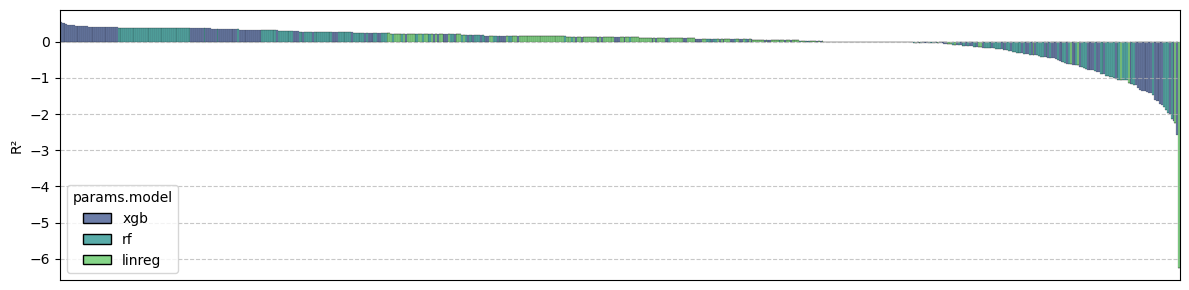

In [17]:
plt.figure(figsize=(12, 3))
sns.histplot(
    data=df_metrics,
    x=df_metrics.index,
    weights=df_metrics["metrics.r2_val"],
    bins=len(df_metrics),  
    hue=df_metrics["params.model"],
    #palette=model_colors,
    palette='viridis',
    element="bars",
    multiple="stack"  
)

plt.xlim(df_metrics.index.min(), df_metrics.index.max())
plt.xlabel("")
plt.ylabel("R²")
plt.xticks([], [])  # Hide x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show legend

plt.tight_layout()
#plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-test-R2.png', dpi=1000)
plt.show()

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ri

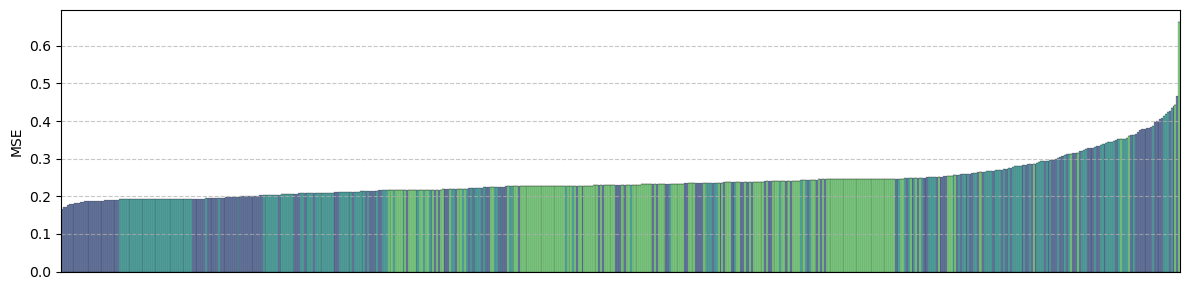

In [18]:
plt.figure(figsize=(12, 3))
sns.histplot(
    data=df_metrics,
    x=df_metrics.index,
    weights=df_metrics["metrics.rmse_val"],
    bins=len(df_metrics),  
    hue=df_metrics["params.model"],
    #palette=model_colors,
    palette='viridis',
    element="bars",
    multiple="stack"  
)

plt.xlim(df_metrics.index.min(), df_metrics.index.max())
plt.xlabel("")
plt.ylabel("MSE")
plt.xticks([], [])  # Hide x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
#plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-test-MSE.png', dpi=1000)
plt.show()

# Extracting trained best models
Get best models for further usage

The best models are stored in Python dictionary best_model_dict with model_type as keys and TunedModel objects as values. To extract a given best model and perform predictions with it, see below code excerpt:

In [67]:
if path_to_store_best_models is not None:
    print(f"Saving best models to {path_to_store_best_models}...")
    if not os.path.exists(path_to_store_best_models):
        os.makedirs(path_to_store_best_models)

    save_best_models(best_model_dict, path_to_store_best_models)

Saving best models to Temp_Harvest21_best_models...


In [68]:
# get best model
best_xgb_model = best_model_dict["xgb"]

In [69]:
# perform prediction with best linreg model
test_predictions = best_xgb_model.predict(test, "test")
train_predictions = best_xgb_model.predict(train_val, "train")

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(


In [70]:
# get true values 
md_df = pd.read_csv(path_to_md, sep='\t', index_col=0)

# subset to only contain the samples in the test dataset 
md_test = md_df.loc[test.index]
md_train = md_df.loc[train_val.index]

true_values_test = md_test['average_temperature'].values
true_values_train = md_train['average_temperature'].values

## Plot

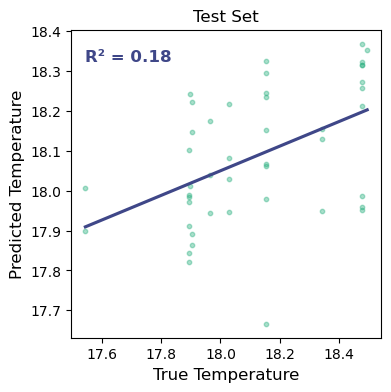

In [71]:
# Create scatterplot
plt.figure(figsize=(4, 4))
sns.regplot(x=true_values_test, y=test_predictions, ci=None, 
            scatter_kws={'s': 10, 'color': '#29AF7FFF', 'alpha':0.4}, 
            line_kws={'color': '#3F4788FF'})

# Compute R² score 
r2 = r2_score(true_values_test, test_predictions)
r2_text = f"R² = {r2:.2f}" if r2 >= 0 else "R² < 0"

# Adjust text position
y_text_position = np.percentile(test_predictions, 95)
plt.text(np.min(true_values_test), y_text_position, r2_text, 
         fontsize=12, color="#3F4788FF", fontweight='bold')

# Labels
plt.xlabel("True Temperature", fontsize=12)
plt.ylabel("Predicted Temperature", fontsize=12)
plt.title('Test Set')
# Show plot
plt.show()

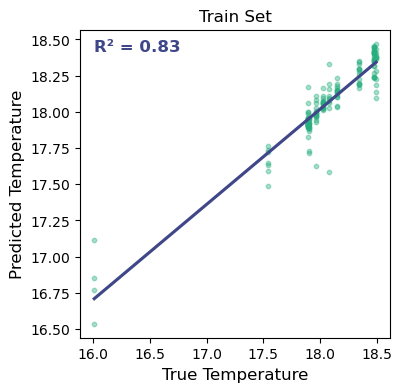

In [72]:
# Create scatterplot
plt.figure(figsize=(4, 4))
sns.regplot(x=true_values_train, y=train_predictions, ci=None, 
            scatter_kws={'s': 10, 'color': '#29AF7FFF', 'alpha':0.4}, 
            line_kws={'color': '#3F4788FF'})

# Compute R² score 
r2 = r2_score(true_values_train, train_predictions)
r2_text = f"R² = {r2:.2f}" if r2 >= 0 else "R² < 0"

# Adjust text position
y_text_position = np.percentile(train_predictions, 95)
plt.text(np.min(true_values_train), y_text_position, r2_text, 
         fontsize=12, color="#3F4788FF", fontweight='bold')

# Labels
plt.xlabel("True Temperature", fontsize=12)
plt.ylabel("Predicted Temperature", fontsize=12)

plt.title('Train Set')

# Show plot
plt.show()